In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly.graph_objects as go
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import MaxNLocator
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from time import process_time 
from src.FunctionsProperties import *
from itertools import combinations
from scipy.optimize import curve_fit
from numpy.linalg import inv
import statsmodels.api as sm
from matplotlib.lines import Line2D
from matplotlib import cm
plt.style.use('properties.mplstyle')

In [7]:
make_results_folders()

In [2]:
df = pd.read_csv("../../data/all_data.txt", delimiter=" ")
df.head()

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_err_per,diameter_mean,diameter_err,diameter_err_per,ass_coeff_mean,ass_coeff_err,ass_coeff_err_per
0,5000,4,13.0,2.0,60952,12.712090,0.002927,0.023023,30.373523,0.009610,0.031639,-0.000145,0.000060,41.836001
1,5000,3,12.0,2.0,40912,13.292194,0.003339,0.025119,31.513981,0.011763,0.037325,-0.000052,0.000072,139.980567
2,5000,4,7.5,2.0,30996,11.503357,0.004193,0.036450,27.971222,0.012988,0.046434,-0.036049,0.000088,0.245332
3,5000,2,6.5,2.0,28277,13.366251,0.004089,0.030594,31.977897,0.014946,0.046737,-0.007291,0.000088,1.201787
4,10000,4,12.0,2.0,24310,13.786958,0.004756,0.034496,33.228754,0.015503,0.046654,0.000701,0.000074,10.546518


In [36]:
N = 5000
alpha_ag_f = 2.0
alpha_a_v = [float(i) for i in np.arange(0.0, 16.25, 0.25)]
alpha_g_v = [float(i) for i in np.arange(1.0, 17, 1.0)]
df_n = df[df["N"]==N]
df_alpha_a = df_n[(df_n["alpha_a"].isin(alpha_a_v)) & (df_n["alpha_g"]==alpha_ag_f)] 
count = 0
print("alpha_a variable")
for index, row in df_alpha_a.iterrows():
    n_samples = int(row['N_samples'])
    alpha_a = float(row['alpha_a'])
    alpha_g = float(row['alpha_g'])
    dim = int(row['dim'])
    
    if(n_samples < 10000 and alpha_a < 16):
        print(f"alpha_a: {alpha_a:.2f}, alpha_g: {alpha_g:.2f}, dim: {dim}, nsamples:{n_samples}")
        count +=1
print(count)

# df_alpha_g = df_n[(df_n["alpha_g"].isin(alpha_g_v)) & (df_n["alpha_a"]==alpha_ag_f)] 
# count = 0
# print("alpha_g variable")
# for index, row in df_alpha_g.iterrows():
#     n_samples = int(row['N_samples'])
#     alpha_a = float(row['alpha_a'])
#     alpha_g = float(row['alpha_g'])
#     dim = int(row['dim'])
    
#     if(n_samples < 20000 and alpha_a < 16):
#         print(f"alpha_a: {alpha_a:.2f}, alpha_g: {alpha_g:.2f}, dim: {dim}, nsamples:{n_samples}")
#         count +=1
# print(count)

alpha_a variable
alpha_a: 13.00, alpha_g: 2.00, dim: 3, nsamples:9945
alpha_a: 11.00, alpha_g: 2.00, dim: 3, nsamples:9943
alpha_a: 11.00, alpha_g: 2.00, dim: 1, nsamples:9853
alpha_a: 13.00, alpha_g: 2.00, dim: 1, nsamples:9825
alpha_a: 13.00, alpha_g: 2.00, dim: 2, nsamples:9799
alpha_a: 11.00, alpha_g: 2.00, dim: 2, nsamples:9656
alpha_a: 12.50, alpha_g: 2.00, dim: 1, nsamples:8039
alpha_a: 1.00, alpha_g: 2.00, dim: 2, nsamples:1153
alpha_a: 3.00, alpha_g: 2.00, dim: 2, nsamples:1153
alpha_a: 3.00, alpha_g: 2.00, dim: 4, nsamples:1153
alpha_a: 5.00, alpha_g: 2.00, dim: 4, nsamples:1153
alpha_a: 4.00, alpha_g: 2.00, dim: 2, nsamples:1153
alpha_a: 2.00, alpha_g: 2.00, dim: 2, nsamples:1153
alpha_a: 2.00, alpha_g: 2.00, dim: 4, nsamples:1153
alpha_a: 4.00, alpha_g: 2.00, dim: 4, nsamples:1153
alpha_a: 6.00, alpha_g: 2.00, dim: 4, nsamples:1153
alpha_a: 1.00, alpha_g: 2.00, dim: 4, nsamples:1153
alpha_a: 1.00, alpha_g: 2.00, dim: 1, nsamples:1153
alpha_a: 3.00, alpha_g: 2.00, dim: 3, ns

In [7]:
import numpy as np
import pandas as pd
import re
from pathlib import Path

# Regex e coleta dos diretórios válidos
pattern = re.compile(r'N_(\d+)/dim_(\d+)/alpha_a_([\d.]+)_alpha_g_([\d.]+)')

base_dir = Path("../../../data")
resultados = []

for path in base_dir.rglob('*'):
    if path.is_dir():
        match = pattern.search(str(path))
        if match:
            N_val = int(match.group(1))
            dim_val = int(match.group(2))
            alpha_a_val = float(match.group(3))
            alpha_g_val = float(match.group(4))
            resultados.append({'N': N_val, 'dim': dim_val, 'alpha_a': alpha_a_val, 'alpha_g': alpha_g_val})

# Conjunto com as combinações de resultados (para busca rápida)
resultados_set = set(
    (r['N'], r['dim'], round(r['alpha_a'], 2), r['alpha_g']) for r in resultados
)

# ---- BLOCO MODIFICADO COMO VOCÊ QUER ----

alpha = np.arange(0.0, 16.0, 0.25)
N_list = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
count = 0.0
alpha_a = []
dim = []
N = []
for n in N_list:
    for d in [1, 2, 3, 4]:
        # Alpha_d para esse N, dim e alpha_g=2.0
        alpha_d = np.sort(
            df[(df["N"] == n) & (df["alpha_g"] == 2.0) & (df["dim"] == d)]["alpha_a"].unique()
        )

        for aa in alpha:
            if aa not in alpha_d:
                # Para cada alpha_a ausente no df, verificar se existe nos resultados brutos
                comb = (n, d, round(aa, 2), 2.0)  # alpha_g = 2.0 fixo
                if comb not in resultados_set:
                    print(f"N={n}, dim={d}, alpha_a={aa:.2f}, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados")
                    N.append(int(n))
                    alpha_a.append(float(aa))
                    dim.append(int(d))
                    count += 1

N=5000, dim=1, alpha_a=11.25, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=1, alpha_a=13.75, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=1, alpha_a=15.75, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=2, alpha_a=11.25, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=2, alpha_a=11.50, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=2, alpha_a=11.75, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=2, alpha_a=15.25, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=11.50, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=11.75, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=12.50, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=13.25, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=14.25, alpha_g=2.0 -> NÃO EXISTE nem no df

In [8]:
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000]
dim = [1,2,3,4]
alpha_filter = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
parameters_calculate(df, N, dim, alpha_filter)

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_G$ FOR MULTIPLIES $N$

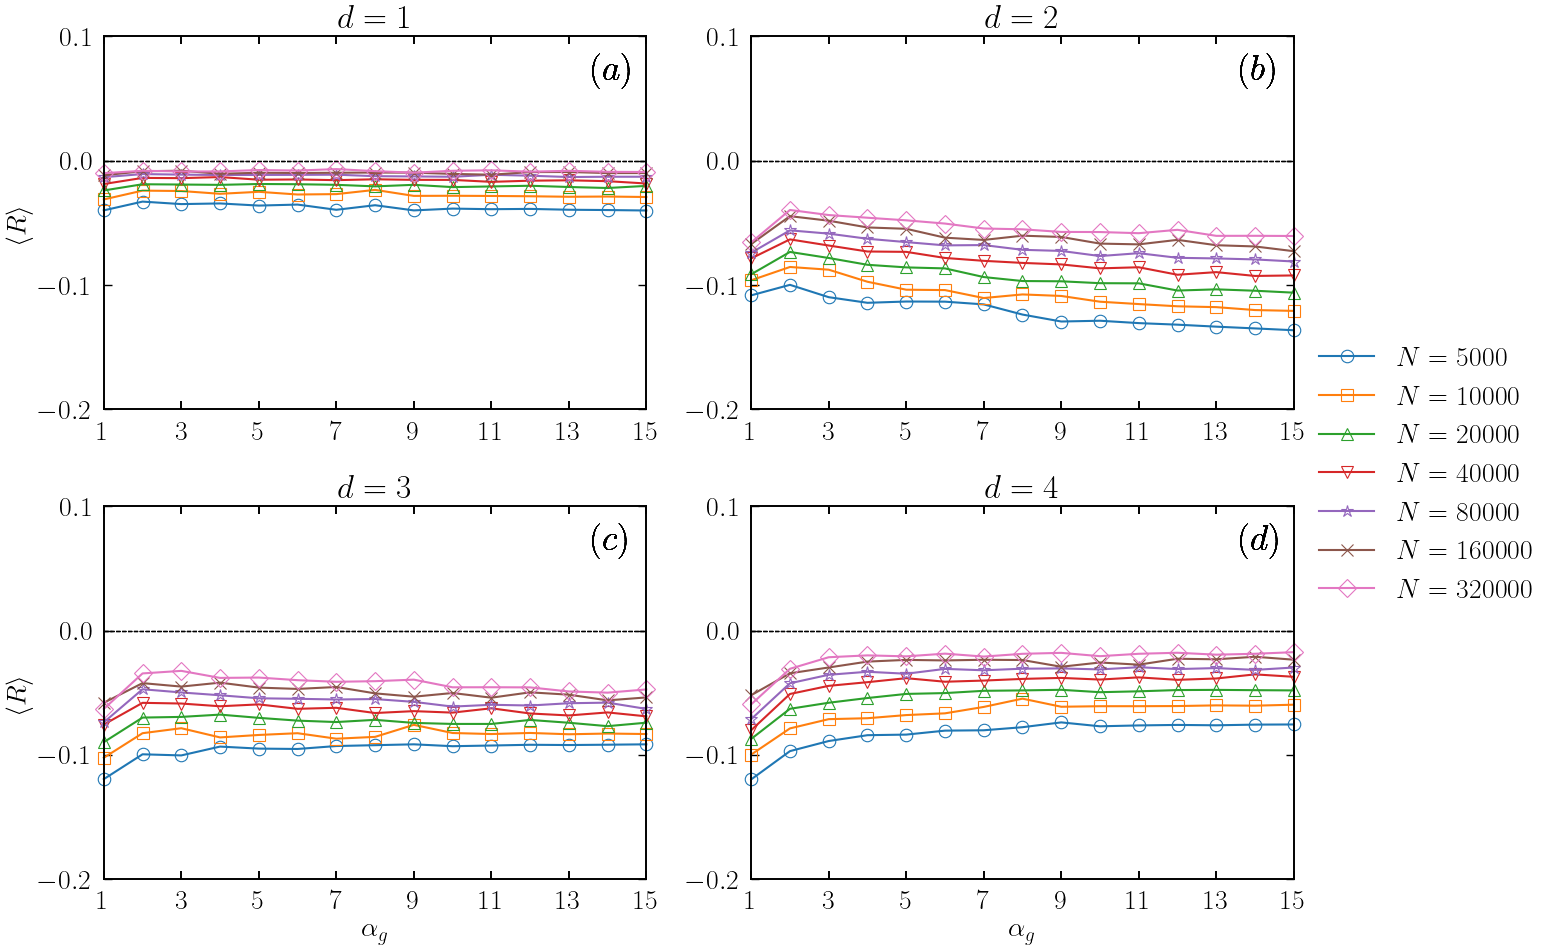

In [9]:
#R/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_g_filter = [i for i in range(0,16)]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]
markersize = 9
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
#clip_on=False,
j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")
        
        # df_ord = df_ord[df_ord["alpha_g"] <= 15.0]
        df_ord = df_ord[df_ord["alpha_g"].isin(alpha_g_filter)]
        # Cria o gráfico de erro
        # ax.plot(df_ord['alpha_g'], df_ord['ass_coeff_mean']/np.log(N[i]), linestyle='-', marker=markers[i],
        #         label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.plot(df_ord['alpha_g'], df_ord['ass_coeff_mean'], linestyle='-', marker=markers[i], clip_on=False,
                label=labels[i])
        ax.text(x=13.6, y=.065, s=lab[j], fontsize=26, color="black")
        ax.axhline(y=0.0, xmin=0.0, xmax=15.0, linestyle='--', color='k', linewidth=0.8, label='_nolegend_')
    j += 1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([-.2, 0.10])
    #ax.set_ylim([-.02, .02])
    #ax.set_yticks(np.linspace(-0.02, 0.02, 5))  # Apenas 5 ticks no eixo y
    ax.set_title(f"$d = {dim}$")
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
    
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$")


# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(left=0.00, right=0.85)

plt.savefig("../../results/alpha_g/R_alpha_g.png", dpi=300)
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


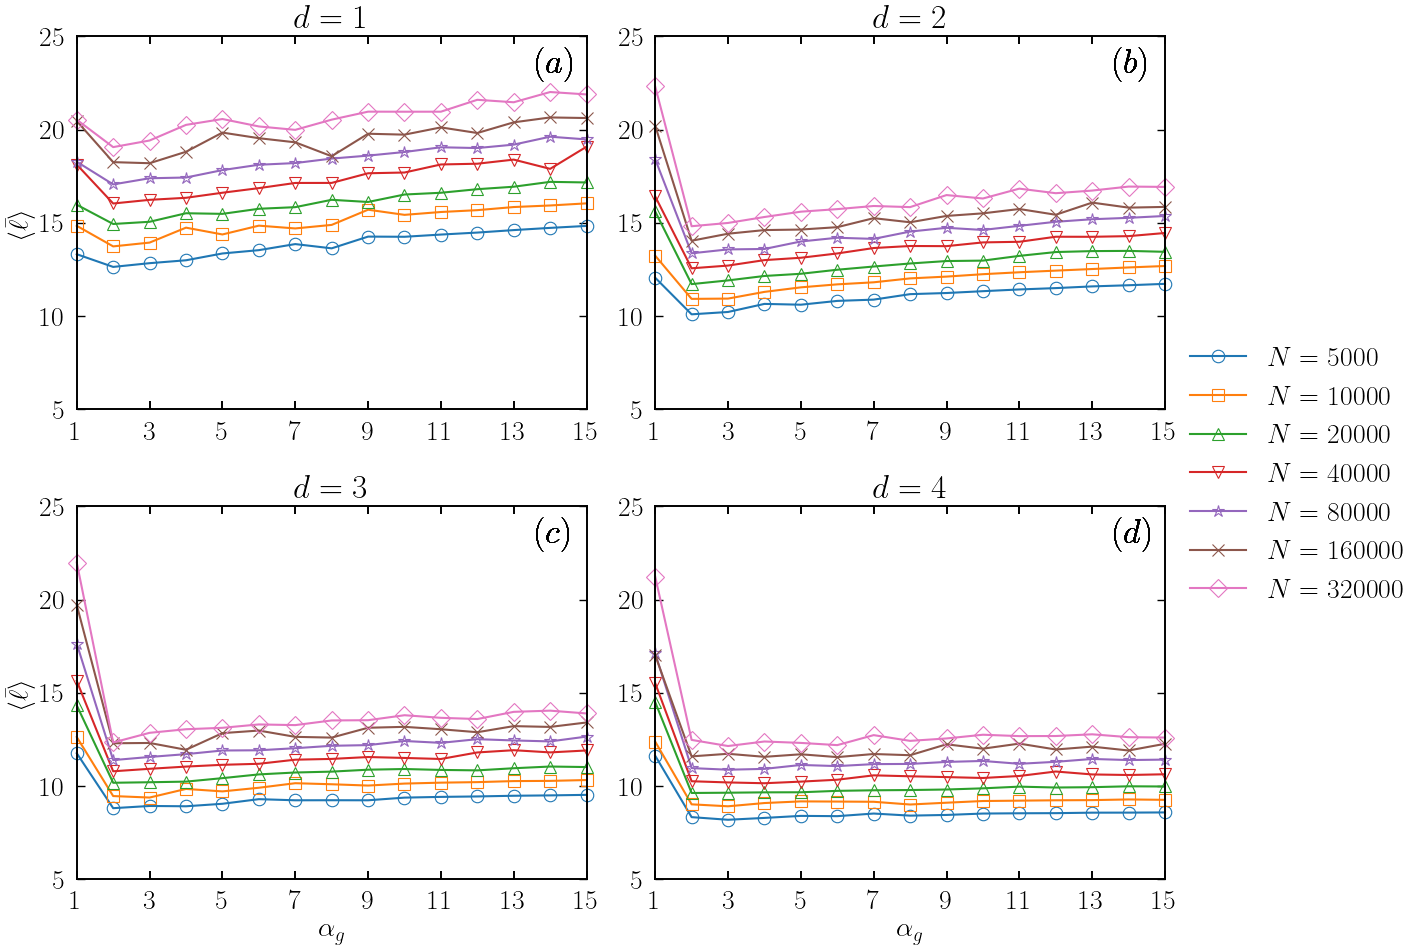

In [10]:
#SHORT/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_g_filter = [i for i in range(0,16)]
print(alpha_g_filter)
# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]
#markersize = 9
#thickness_axes = 1.4
dimensions = [1, 2, 3, 4]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        df_ord = df_ord[df_ord["alpha_g"].isin(alpha_g_filter)]
        ax.plot(df_ord['alpha_g'], df_ord['short_mean'], linestyle='-', marker=markers[i], clip_on=False,
                    label=labels[i])
        #ax.text(x=12.2, y=4.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
         #       color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.6, y=23, s=lab[j], fontsize=25, color="black")
        
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([5.0, 25])
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(1))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
    ax.set_title(f"$d = {dim}$")
    # Condições para exibir rótulos dos eixos em subplots específicos
    
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$")

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/short_alpha_g.png", dpi=300)
plt.show()

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_A$ FOR MULTIPLIES $N$

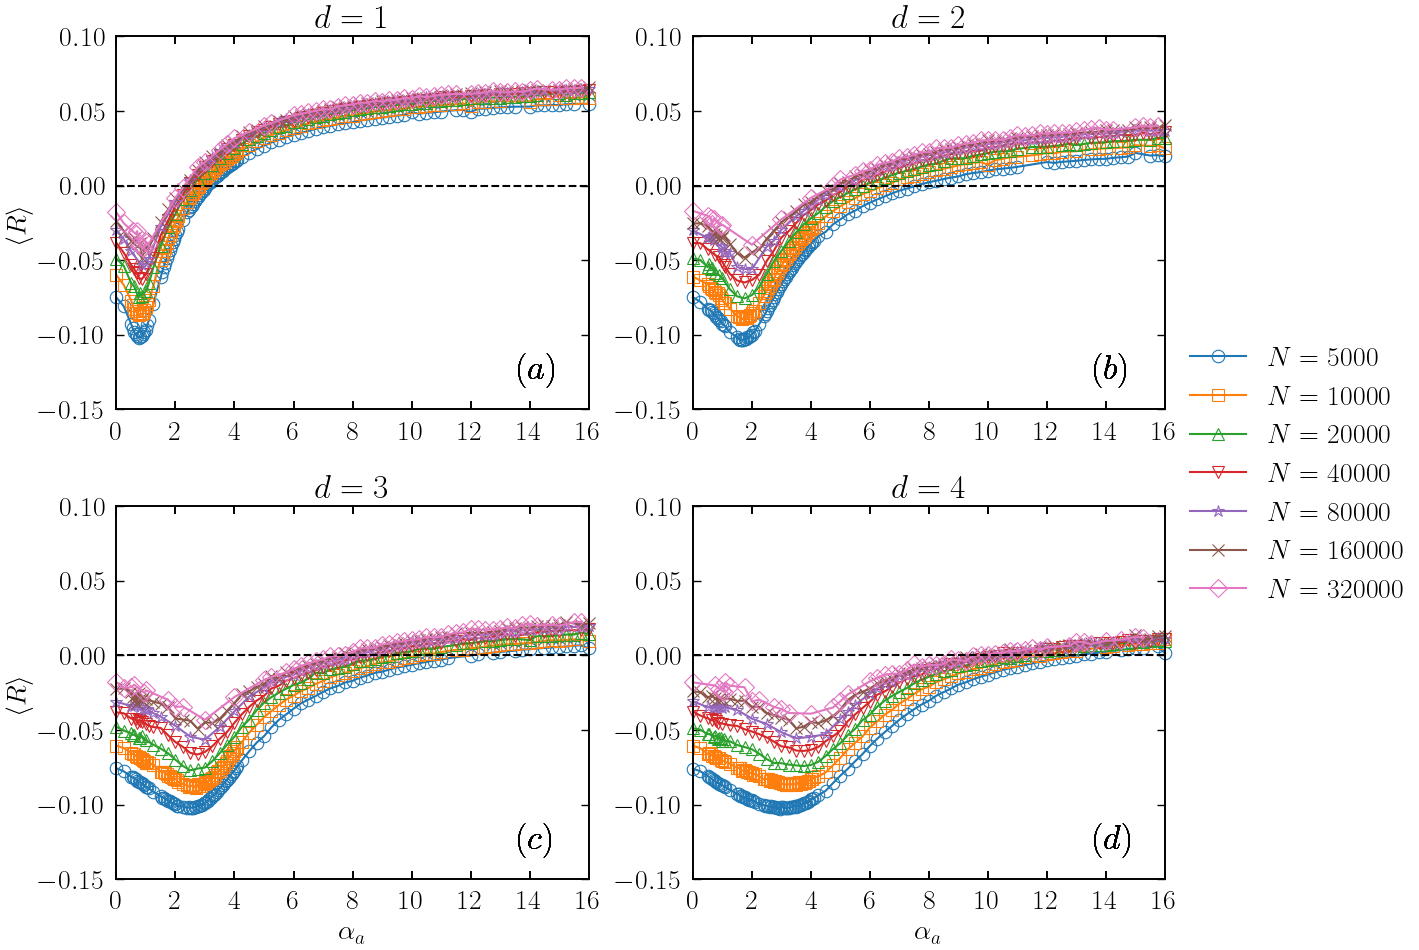

In [11]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_a_filter = np.arange(0.0, 16.25, 0.25)

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]
dimensions = [1, 2, 3, 4]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        df_ord = df_ord[df_ord["alpha_a"] <= 16.0]
        #df_ord = df_ord[df_ord["alpha_a"].isin(alpha_a_filter)]
        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
        #             yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        
        ax.plot(df_ord['alpha_a'], df_ord['ass_coeff_mean'], linestyle='-', marker=markers[i], clip_on=False,
                    label=labels[i])
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        # ax.text(x=12.2, y=-.13, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.6, y=-.13, s=lab[j], fontsize=25, color="black")
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 16])
    ax.set_ylim([-.15, .10])
    ax.set_clip_on(True)  # Garante que os elementos dentro do Axes não ultrapassem os limites
    

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
    ax.set_title(f"$d = {dim}$")
    
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$")

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/R_multi_N_alpha_a.png", dpi=300)
plt.show()

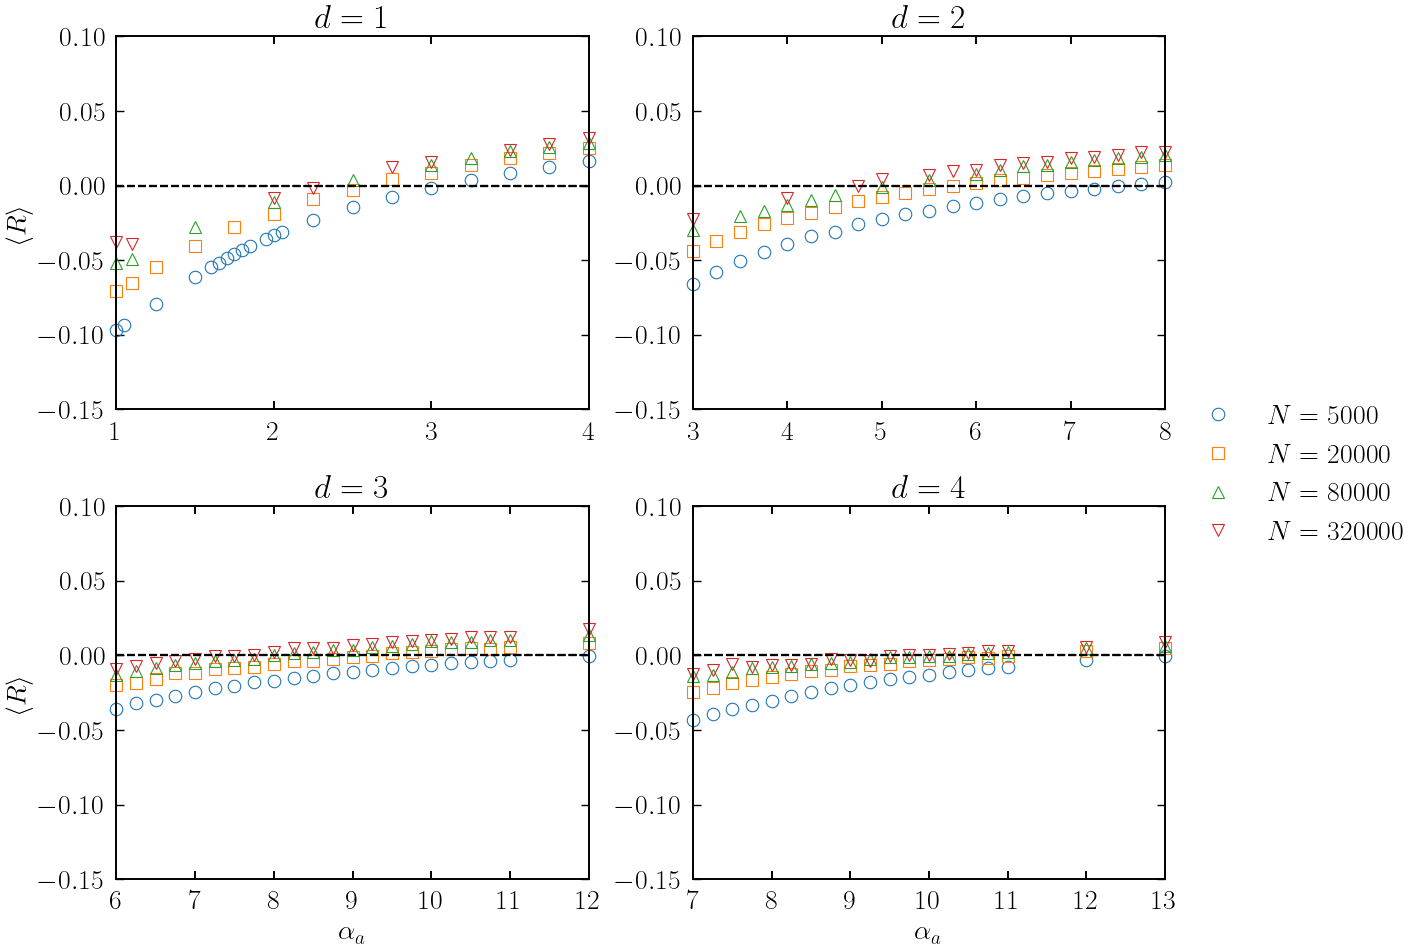

In [14]:
#R VERSUS ALPHA_G WITH MULITPLY N
#N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
N = [5000, 20000,  80000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]
dimensions = [1, 2, 3, 4]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

j = 0
x_lim = [(1.0, 4.0), (3.0, 8.0), (6.0, 12.0), (7.0, 13.0)]
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        df_ord = df_ord[(df_ord["alpha_a"] >= x_lim[dim_idx][0]) & (df_ord["alpha_a"] <= x_lim[dim_idx][1])]
        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
        #             yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        
        ax.plot(df_ord['alpha_a'], df_ord['ass_coeff_mean'], linestyle='none', marker=markers[i], clip_on=False,
                    label=labels[i])
        ax.hlines(y=0.0, xmin=x_lim[dim_idx][0], xmax=x_lim[dim_idx][1], linestyle='--', color='k', label='_nolegend_')
        # ax.text(x=12.2, y=-.13, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        #ax.text(x=13.6, y=-.13, s=lab[j], fontsize=25, color="black")
        ax.set_xlim([x_lim[dim_idx][0], x_lim[dim_idx][1]])
    #ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    
    ax.set_ylim([-.15, .10])
    ax.set_clip_on(True)  # Garante que os elementos dentro do Axes não ultrapassem os limites
    

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(1))
    
    #ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
    ax.set_title(f"$d = {dim}$")
    
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$")

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/alpha_a/R_multi_N_alpha_a.pdf")
plt.show()

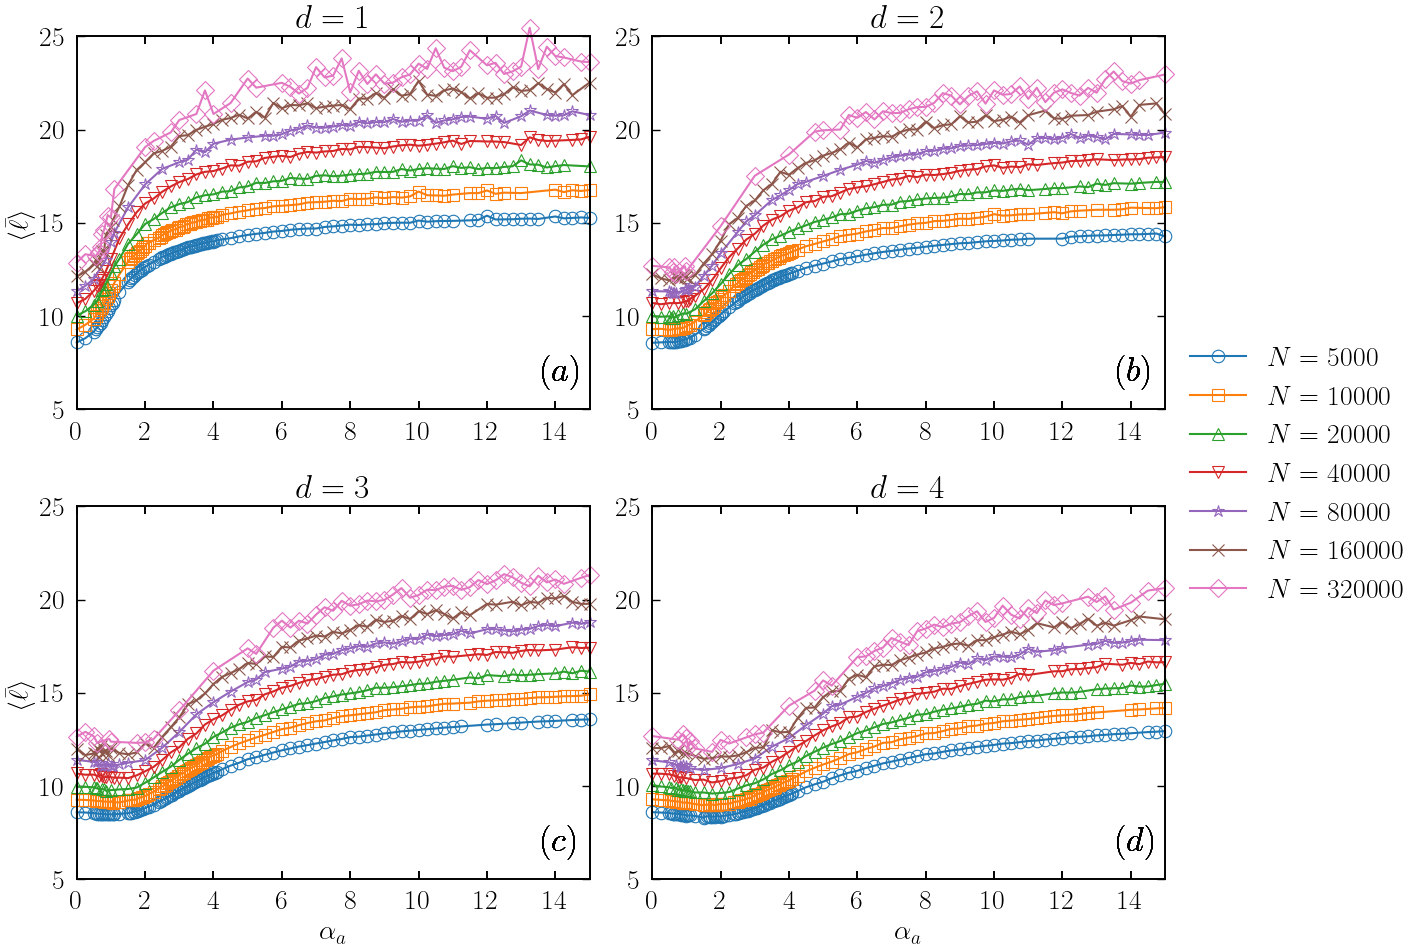

In [12]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
alpha_a_filter = np.arange(0.0, 16.25, 0.25)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]

thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

#dim = [1,2,3,4]
j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        df_ord = df_ord[df_ord["alpha_a"] <= 15.0]
        #df_ord = df_ord[df_ord["alpha_a"].isin(alpha_a_filter)]
        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['short_mean'],
        #             yerr=df_ord['short_err'], linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.plot(df_ord['alpha_a'], df_ord['short_mean'], linestyle='-', marker=markers[i], clip_on=False,
            label=labels[i])
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        # ax.text(x=12.4, y=6.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.6, y=6.5, s=lab[j], fontsize=25, color="black")
        ax.set_title(f"$d = {dim}$")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([5, 25])
    

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    #ax.set_xticks([0.0, 3.0, 6.0, 9.0, 12.0, 15.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$")

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/short_multi_N_alpha_a.png",dpi=300)
plt.show()

## CALCULATE THE PROPERTIES LINEAR REGRESSION

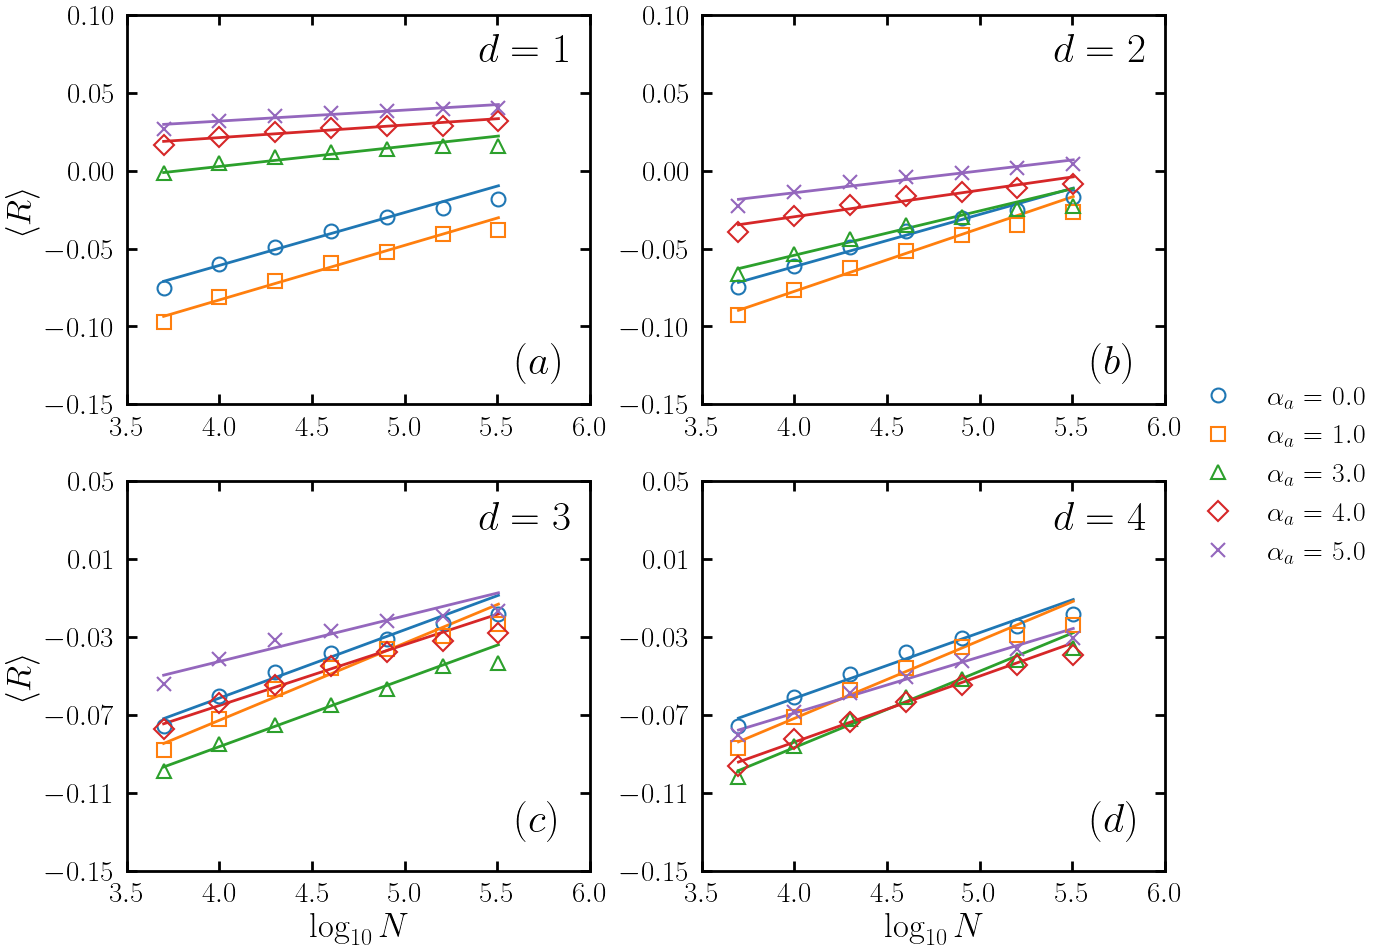

In [19]:
# Dados e configurações
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

markers = ['o', 's', '^', 'D', 'x']
count_box = 0

markersize = 10
thickness_axes = 2.0
mew = 1.5

# Certifique-se de que a variável "lab" esteja definida
lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Facilita o acesso aos subplots com índice linear


# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:
                N_aux.append(n)
                prop.append(df_dim_alpha_a["ass_coeff_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["ass_coeff_err"].tolist()[0])
        
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        ax.errorbar(np.log10(N_aux), prop, linestyle='None', marker=markers[count],mew=mew,markersize=markersize,
                    label=rf"$\alpha_a$ $=$ ${alpha}$")
        ax.plot(np.log10(N_aux), regression, color=colors[count],linewidth=thickness_axes,label="_nolegend_")
        count += 1
    x_p = 5.6
    x_p_d = 5.4
    # Define a posição do texto para cada subplot
    if dim_idx in [0, 1]:
        y_p = -0.13
        y_p_d = 0.070
    else:
        y_p = -0.13  # Se desejar alterar para outra posição nos subplots inferiores, ajuste aqui.
        y_p_d = 0.025
    
    ax.text(x=x_p, y=y_p, s=lab[count_box], fontsize=30, color="black")
    ax.text(x=x_p_d, y=y_p_d, s=f"$d = {dim}$", fontsize=30, color="black")
    count_box += 1
    
    # Define os limites e configurações dos eixos
    ax.set_xlim([3.5, 6])
    if dim_idx < 2:  # Subplots da primeira linha
        ax.set_ylim([-0.15, 0.10])
    else:           # Subplots da segunda linha
        ax.set_ylim([-0.15, 0.05])
        ax.set_yticks(np.linspace(-0.15, 0.05, 6))  # Define 6 ticks igualmente espaçados
    
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:
        ax.set_xlabel(r"$\log_{10}N$", fontsize=25)
    if dim_idx % 2 == 0:
        ax.set_ylabel(r"$\langle R \rangle$", fontsize=25)
    
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)
    
    ax.tick_params(axis='both', which='major', direction='in', length=7, width=2, labelsize=21)
    ax.tick_params(axis='both', which='minor', direction='in', length=4, width=2)
# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot],
           prop={"size": 20}, fancybox=True, framealpha=0.0, loc='center left',
           bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/N/R_linear_N.png", dpi=300)
plt.show()

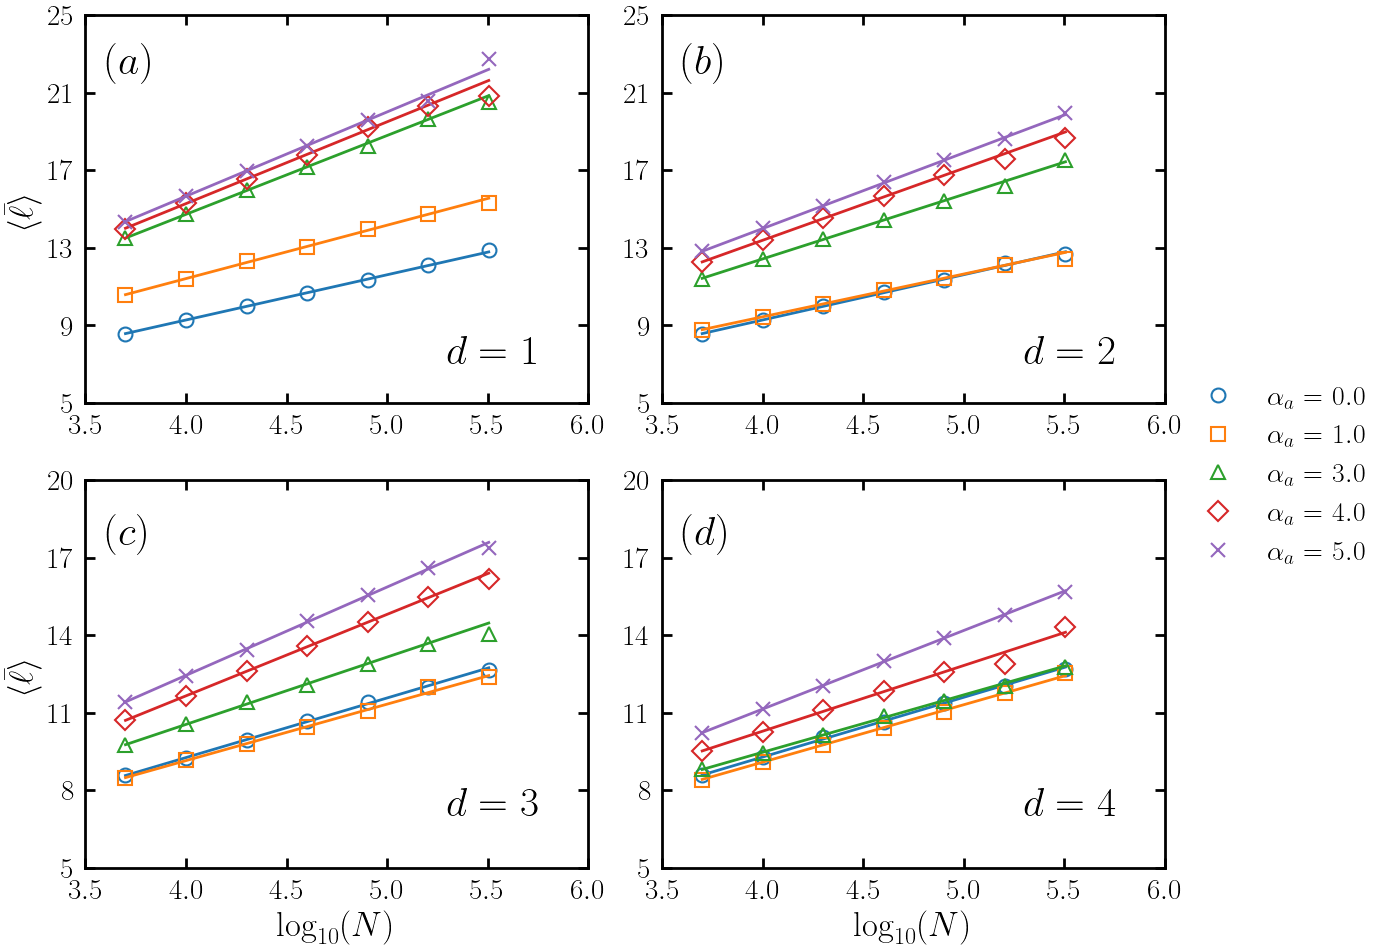

In [31]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
# Cores para os gráficos; note que a lista foi redefinida para 5 cores
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0

# Certifique-se de que a variável "lab" esteja definida, por exemplo:
lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
markers = ['o', 's', '^', 'D', 'x']

markersize = 10
thickness_axes = 2.0
mew = 1.5

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Facilita o acesso aos subplots com um índice linear


# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico se o filtro retornar dados
            if not df_dim_alpha_a.empty:
                N_aux.append(n)
                prop.append(df_dim_alpha_a["short_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["short_err"].tolist()[0])
                
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        
        # Plota os dados e o ajuste
        ax.plot(np.log10(N_aux), prop, linestyle='None', marker=markers[count], mew=mew, markersize=markersize,
                label=rf"$\alpha_a$ $=$ ${alpha}$")
        ax.plot(np.log10(N_aux), regression, color=colors[count], linewidth=thickness_axes ,label="_nolegend_")
        count += 1
    
    x_p = 3.6
    x_p_d = 5.3
    # Define a posição do texto conforme o subplot:
    if dim_idx in [0, 1]:
        y_p = 22
        y_p_d = 7
    else:
        y_p = 17.5
        y_p_d = 7
    ax.text(x=x_p, y=y_p, s=lab[count_box], fontsize=30, color="black")
    ax.text(x=x_p_d, y=y_p_d, s=f"$d = {dim}$", fontsize=30, color="black")
    count_box += 1
    
    # Define os limites e configurações dos eixos
    ax.set_xlim([3.5, 6])
    
    
    # Define limites do eixo y conforme a posição do subplot
    if dim_idx < 2:  # Subplots da primeira linha
        ax.set_ylim([5, 25])
    else:           # Subplots da segunda linha
        ax.set_ylim([5, 20])
    
    # Configura os ticks do eixo y para ter exatamente 6 ticks (inclusos os limites)
    ymin, ymax = ax.get_ylim()
    ax.set_yticks(np.linspace(ymin, ymax, 6))
    
    # Configura os rótulos dos eixos para subplots específicos
    if dim_idx in [2, 3]:
        ax.set_xlabel(r"$\log_{10}(N)$", fontsize=25)
    if dim_idx % 2 == 0:
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=25)

    ax.tick_params(axis='both', which='major', direction='in', length=7, width=2, labelsize=21)
    ax.tick_params(axis='both', which='minor', direction='in', length=4, width=2)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)
    
# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot], loc='center left',
           bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda

plt.savefig("../../results/N/short_linear_N.png", dpi=300)
plt.show()


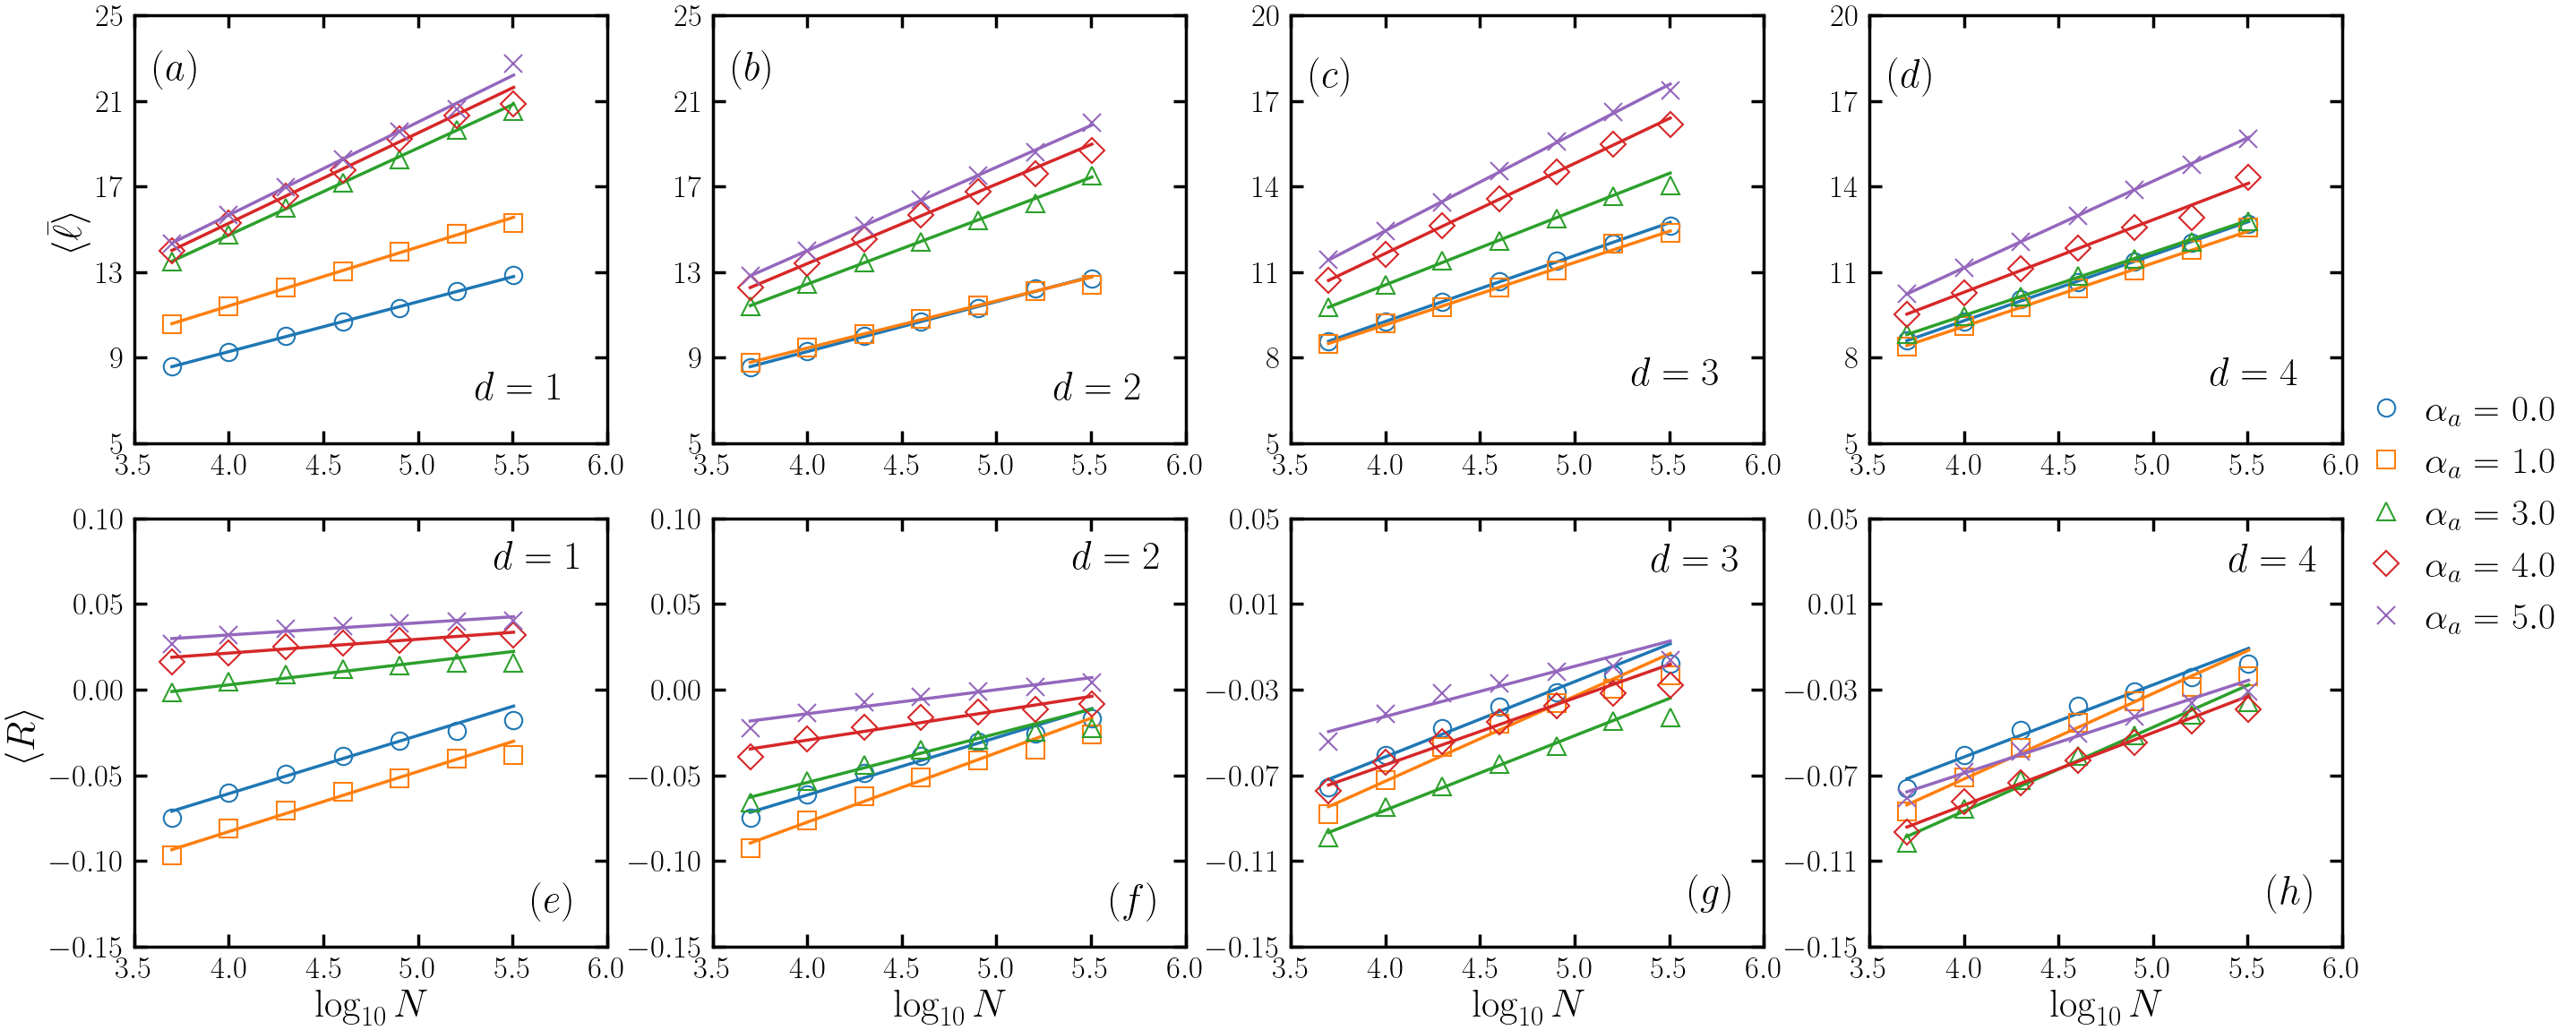

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Parâmetros de plotagem
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
markers = ['o', 's', '^', 'D', 'x']
lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$", "$(e)$", "$(f)$", "$(g)$", "$(h)$"]

markersize = 14
thickness_axes = 2.5
fontsize_labels = 32
fontsize_legend = 30
fontsize_ticks = 25
fontsize_panel = 32
mew = 1.5

# Ticks manuais fixos por subplot
yticks_ell = {
    0: np.linspace(5, 25, 6),
    1: np.linspace(5, 25, 6),
    2: np.linspace(5, 20, 6),
    3: np.linspace(5, 20, 6),
}

yticks_R = {
    0: np.linspace(-0.15, 0.10, 6),
    1: np.linspace(-0.15, 0.10, 6),
    2: np.linspace(-0.15, 0.05, 6),
    3: np.linspace(-0.15, 0.05, 6),
}

# Criação da figura
fig, axes = plt.subplots(2, 4, figsize=(30, 12))
axes = axes.flatten()
count_box = 0

# Tipos de métrica: primeira linha 'short_mean', segunda linha 'ass_coeff_mean'
for plot_type in ["short_mean", "ass_coeff_mean"]:
    for dim_idx, dim in enumerate(dimensions):
        count = 0
        ax = axes[count_box]

        for alpha in alpha_filter_plot:
            N_aux, prop, prop_err = [], [], []
            for n in N:
                df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
                df_filtered = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
                if not df_filtered.empty:
                    N_aux.append(n)
                    prop.append(df_filtered[plot_type].tolist()[0])
                    err_col = "short_err" if plot_type == "short_mean" else "ass_coeff_err"
                    prop_err.append(df_filtered[err_col].tolist()[0])

            if N_aux:
                regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
                ax.plot(np.log10(N_aux), prop, linestyle='None', marker=markers[count], mew=mew,
                        markersize=markersize, label=rf"$\alpha_a$ $=$ ${alpha}$")
                ax.plot(np.log10(N_aux), regression, color=colors[count], linewidth=thickness_axes, label="_nolegend_")
            count += 1

        # Ajustes específicos para cada tipo de métrica
        if plot_type == "short_mean":
            x_p, x_p_d = 3.6, 5.3
            y_p = 22 if dim_idx < 2 else 17.5
            y_p_d = 7
            ax.set_ylim([5, 25] if dim_idx < 2 else [5, 20])
            ax.set_yticks(yticks_ell[dim_idx])

            if count_box == 0:
                ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fontsize_labels)
            if count_box >= 4:
                ax.set_xlabel(r"$\log_{10}(N)$", fontsize=fontsize_labels)
        else:
            x_p, x_p_d = 5.6, 5.4
            y_p = -0.13
            y_p_d = 0.070 if dim_idx < 2 else 0.025
            ax.set_ylim([-0.15, 0.10] if dim_idx < 2 else [-0.15, 0.05])
            ax.set_yticks(yticks_R[dim_idx])

            if count_box == 4:
                ax.set_ylabel(r"$\langle R \rangle$", fontsize=fontsize_labels)
            ax.set_xlabel(r"$\log_{10}N$", fontsize=fontsize_labels)

        # Comum a todos
        ax.set_xlim([3.5, 6])
        ax.text(x=x_p, y=y_p, s=lab[count_box], fontsize=fontsize_panel, color="black")
        ax.text(x=x_p_d, y=y_p_d, s=f"$d = {dim}$", fontsize=fontsize_panel, color="black")
        ax.tick_params(axis='both', which='major', direction='in', length=10, width=thickness_axes, labelsize=fontsize_ticks)
        ax.tick_params(axis='both', which='minor', direction='in', length=7, width=thickness_axes, labelsize=fontsize_ticks)
        for spine in ax.spines.values():
            spine.set_linewidth(thickness_axes)

        count_box += 1

# Legenda comum
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot],
           loc='center left', bbox_to_anchor=(0.87, 0.5), prop={"size": fontsize_legend},handletextpad=0.05,alignment='center')

# Ajuste de layout e salvamento
plt.tight_layout()
plt.subplots_adjust(right=0.88)
plt.savefig("../../results/N/combined_short_R_linear_N.png", dpi=300)
plt.show()


## CALCULATE LINEAR COEFFICIENT VERSUS $\alpha_a$

In [61]:
# Linear Regression calculate
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

coeff_all = {"alpha_a":[], "alpha_g":[], "dim":[], 
             "A_ass":[], "A_ass_err":[], "B_ass":[], "B_ass_err":[],
             "A_diameter":[], "A_diameter_err":[], "B_diameter":[], "B_diameter_err":[],
             "A_short":[], "A_short_err":[], "B_short":[], "B_short_err":[]}

properties = ["ass", "diameter", "short"]

# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
        
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter:
        N_aux = []
        prop = []
        prop_err = []
        
        for j in range(len(properties)):
            # Loop sobre os diferentes valores de N
            for n in N:
                # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
                df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
                df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
                
                # Adiciona os dados ao gráfico
                if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                    N_aux.append(n)
                    if(properties[j]=="ass"):
                        prop_name = "ass_coeff_mean"
                        prop_name_err = "ass_coeff_err"
                    
                    elif(properties[j]=="diameter"):
                        prop_name = "diameter_mean"
                        prop_name_err = "diameter_err"
                    
                    elif(properties[j]=="short"):
                        prop_name = "short_mean"
                        prop_name_err = "short_err"
                    
                    prop.append(df_dim_alpha_a[prop_name].tolist()[0])
                    prop_err.append(df_dim_alpha_a[prop_name_err].tolist()[0])

            regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=True)
                
            coeff_all[f"A_{properties[j]}"].append(regression[0])
            coeff_all[f"B_{properties[j]}"].append(regression[1])
            coeff_all[f"A_{properties[j]}_err"].append(regression[2])
            coeff_all[f"B_{properties[j]}_err"].append(regression[3])
            
        coeff_all["alpha_a"].append(alpha)
        coeff_all["dim"].append(dim)
        coeff_all["alpha_g"].append(2)

df_coeff = pd.DataFrame(data=coeff_all)
df_coeff.to_csv("../../data/coeff_linear.txt", sep=' ', index=False)
df_coeff.head()

,alpha_a,alpha_g,dim,A_ass,A_ass_err,B_ass,B_ass_err,A_diameter,A_diameter_err,B_diameter,B_diameter_err,A_short,A_short_err,B_short,B_short_err
0,0.0,2,1,0.014757,0.001106,-0.196697,0.010589,0.014369,0.059029,-0.191748,0.565066,0.012576,0.077094,-0.168997,0.737982
1,1.0,2,1,0.015235,0.001110,-0.223264,0.010921,0.014734,0.058307,-0.216749,0.573596,0.012880,0.070767,-0.193168,0.696151
2,3.0,2,1,0.005633,0.000556,-0.049105,0.005068,0.005449,0.033685,-0.047033,0.307207,0.004551,0.047315,-0.036816,0.431517
3,4.0,2,1,0.003513,0.000498,-0.011045,0.005158,0.003424,0.016163,-0.010022,0.167301,0.002915,0.024064,-0.004158,0.249079
4,5.0,2,1,0.003067,0.000505,0.003671,0.005302,0.003003,0.013552,0.004417,0.142206,0.002607,0.020786,0.009058,0.218119


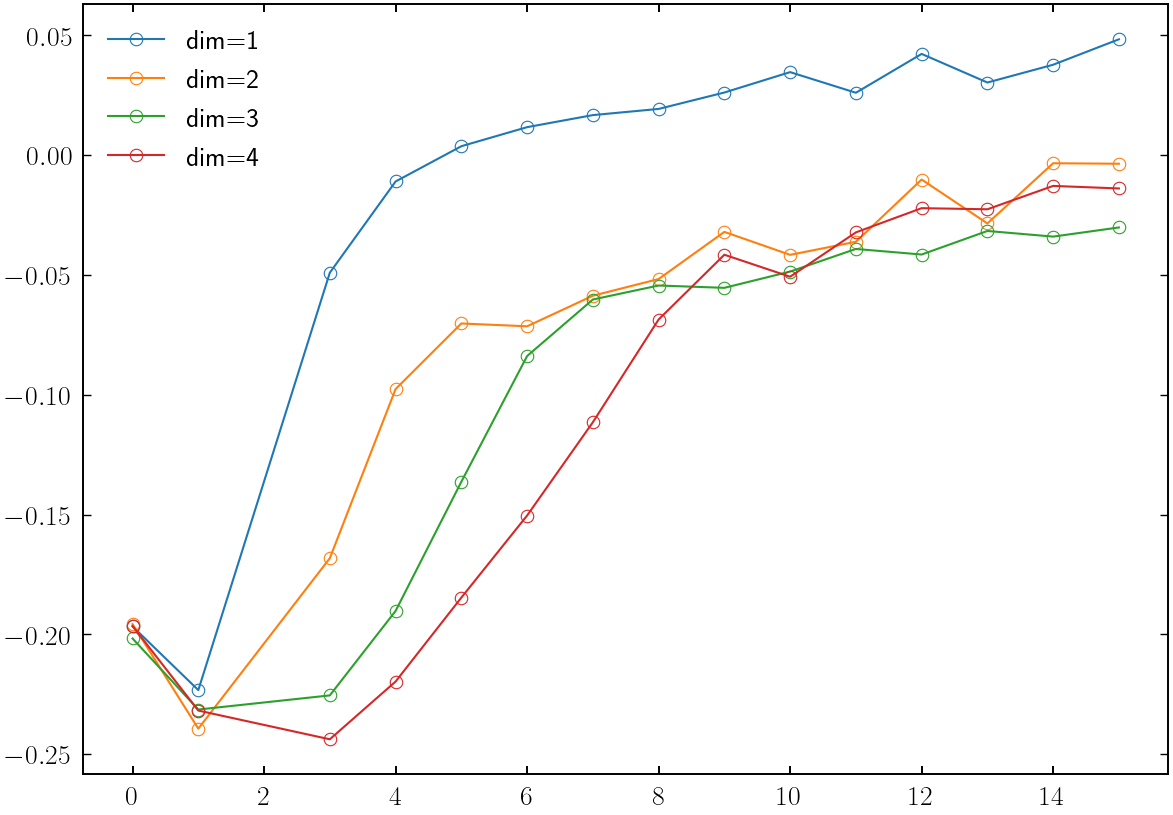

In [74]:
for d in [1,2,3,4]:
    df_d = df_coeff[df_coeff["dim"]==d]
    plt.plot(df_d["alpha_a"], df_d["B_ass"],'o-',label=f'dim={d}')
plt.legend()
plt.show()

## PLOT TO UNIQUE N VALUE ($N$ $=$ $160000$) WITH $\alpha_g$ $=$ $2.0$

/tmp/ipykernel_118940/3246227538.py:82: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


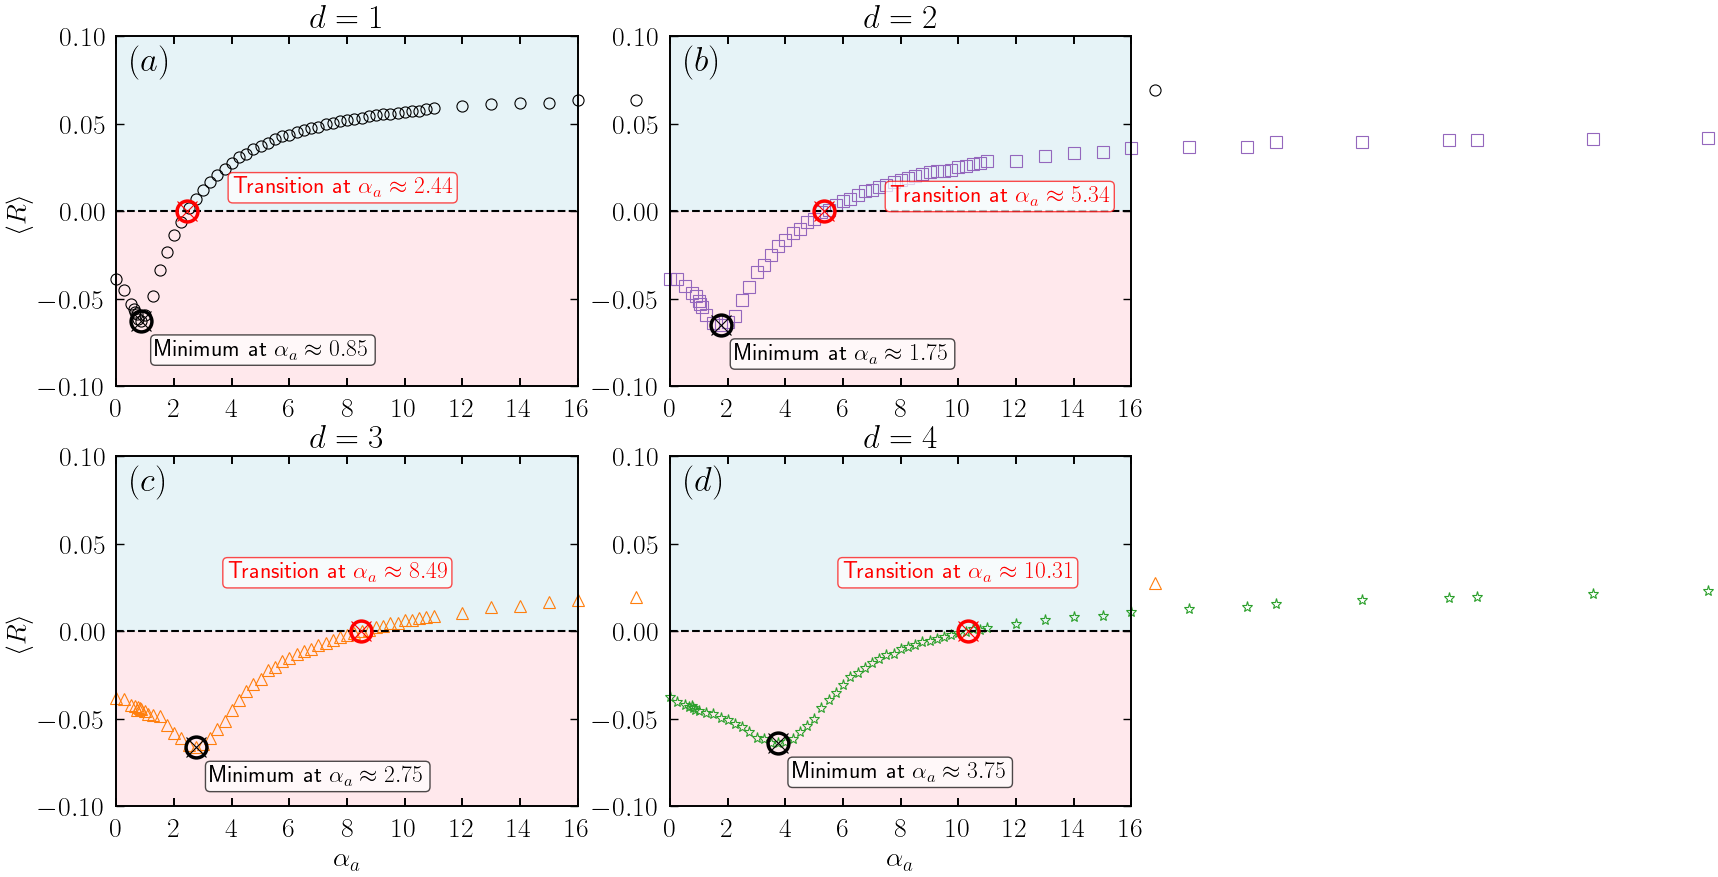

In [7]:
# Configuração inicial
N = 40000
dimensions = [1, 2, 3, 4]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
linestyles = ['-' for _ in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markersize = 8
markers = ['o', 's', '^', '*']
colors = ['#000000', '#9467bd', '#ff7f0e', '#2ca02c']
lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
j = 0
pos_aux = 0
pos_int = [(4.036022064786841, 0.01), (7.623711040778039, 0.005), (7.6606537152484435,0.03), (9.978414032555996, 0.03)]

for dim_idx, dim in enumerate(dimensions):
        axes[dim_idx].axhspan(0, 0.10, facecolor='lightblue', alpha=0.3)  # Azul na parte superior
        axes[dim_idx].axhspan(-0.10, 0, facecolor='lightpink', alpha=0.3)  # Rosa na parte inferior
        ax = axes[dim_idx]
        df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        
        min_row = df_ord.loc[df_ord['ass_coeff_mean'].idxmin()]
        alpha_min = min_row['alpha_a']
        value_min = min_row['ass_coeff_mean']
    
        # Adiciona marcador no ponto mínimo
        # Adiciona marcador no ponto mínimo (duplo para destacar)
        ax.plot(alpha_min, value_min, 'x', markersize=14, color='black', zorder=5, label='_nolegend_')
        ax.plot(alpha_min, value_min, marker='o', markersize=15, markerfacecolor='none',
                markeredgecolor='black', markeredgewidth=2.5, zorder=4, label='_nolegend_')


        ax.text(min(alpha_min + 0.5, 14.5), max(value_min - 0.02, -0.09),
            rf"Minimum at $\alpha_a \approx {alpha_min}$",
            fontsize=17, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
        
        # Encontra a interseção com y = 0
        x_intercept, y_intercept = find_intersection(df_ord['alpha_a'].values, df_ord['ass_coeff_mean'].values)
    
        if x_intercept is not None:
                ax.plot(x_intercept, y_intercept, 'x', markersize=14, color='red', zorder=5, label='_nolegend_')
                ax.plot(x_intercept, y_intercept, marker='o', markersize=15, markerfacecolor='none',
                markeredgecolor='red', markeredgewidth=2.5, zorder=4, label='_nolegend_')

                x_int, y_int = pos_int[pos_aux][0], pos_int[pos_aux][1]
                
                ax.text(x_int, y_int,
                        rf"Transition at $\alpha_a \approx {x_intercept:.2f}$",
                        fontsize=17, color='red', weight='bold',
                        bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.2', alpha=0.7),
                        ha='center' if dim_idx >= 2 else 'left')
                #x_it = x_intercept if dim_idx >= 2 else min(x_intercept + 0.2, 13.8)
                #y_it = y_intercept + 0.03 if dim_idx >= 2 else max(y_intercept + 0.01, -0.07)
                pos_aux += 1
        
        ax.plot(df_ord['alpha_a'], df_ord['ass_coeff_mean'], linestyle='none' ,marker=markers[j], clip_on=False,
                label=dim, markersize=markersize ,color=colors[j])
        
        ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
        
        ax.text(x=0.5, y=.08, s=lab[j], fontsize=25, color="black")
        j += 1

        ax.set_xlim([0.0, 16])
        ax.set_ylim([-0.10, 0.10])
        
        
        ax.xaxis.set_major_locator(MultipleLocator(2))
        #ax.xaxis.set_minor_locator(MultipleLocator(1))
        #ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
        ax.set_title(f"$d = {dim}$")
        
        if dim_idx in [2, 3]:
                ax.set_xlabel(r"$\alpha_a$")
        if dim_idx % 2 == 0:
                ax.set_ylabel(r"$\langle R \rangle$")


plt.tight_layout()
plt.subplots_adjust(right=0.85)
#plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a.png", dpi=300)
plt.show()

## ANALYSIS OF MINIMUM AND TRANSITION

In [21]:
def find_intersections(x, y):
    """
    Encontra todas as interseções entre os pontos dados (x, y) e a reta y = 0.

    Parâmetros:
    x : array-like : Coordenadas x dos pontos de dados
    y : array-like : Coordenadas y dos pontos de dados

    Retorna:
    intersecoes : Lista de tuples [(x_intercept1, 0), (x_intercept2, 0), ...]
    """
    intersecoes = []

    # Percorre os pontos para encontrar trocas de sinal
    for i in range(len(y) - 1):
        if y[i] * y[i + 1] < 0:  # Troca de sinal indica interseção
            x1, x2 = x[i], x[i + 1]
            y1, y2 = y[i], y[i + 1]
            
            # Cálculo da interseção por interpolação linear
            x_intercept = x1 - (y1 * (x2 - x1)) / (y2 - y1)
            
            intersecoes.append((x_intercept, 0))  # Adiciona o ponto de interseção

    return intersecoes if intersecoes else None  # Retorna None se não houver interseções


In [22]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
parms_intercept = {"N":[], "dim":[], "alpha_intercept":[]}
dimensions = [1,2,3,4]

for dim in dimensions:
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i]) & (df["alpha_g"]==2.0)]
        
        df_ord = df_dim.sort_values(by="alpha_a")
        
        x = df_ord['alpha_a'].values
        y = df_ord['ass_coeff_mean'].values
        
        x_int, y_int = find_intersection(x, y)
        
        parms_intercept["N"].append(N[i])
        parms_intercept["dim"].append(int(dim))
        parms_intercept["alpha_intercept"].append(float(x_int))

In [23]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

parms_min = {"N":[], "dim":[], "alpha_min":[], "R_min":[]}
dimensions = [1,2,3,4]

for dim in dimensions:
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i]) & (df["alpha_g"]==2.0)]
        df_ord = df_dim.sort_values(by="alpha_a")
        
        x = df_ord['alpha_a'].values
        y = df_ord['ass_coeff_mean'].values
        
        x_min = [float(i) for i,j in zip(x,y) if j == min(y)]
        y_min = [float(j) for i,j in zip(x,y) if j == min(y)]
        
        parms_min["N"].append(N[i])
        parms_min["dim"].append(int(dim))
        parms_min["alpha_min"].append(x_min[0])
        parms_min["R_min"].append(y_min[0])

In [24]:
df_min = pd.DataFrame(data=parms_min)
df_min

,N,dim,alpha_min,R_min
0,5000,1,0.75,-0.101928
1,10000,1,0.75,-0.086518
2,20000,1,0.75,-0.075000
3,40000,1,0.85,-0.062774
4,80000,1,0.85,-0.053533
5,160000,1,0.85,-0.048563
6,320000,1,0.90,-0.042193
7,5000,2,1.60,-0.103478
8,10000,2,1.65,-0.089789
9,20000,2,1.75,-0.075704


In [25]:
df_int = pd.DataFrame(data=parms_intercept)
df_int

,N,dim,alpha_intercept
0,5000,1,3.072512
1,10000,1,2.801387
2,20000,1,2.595935
3,40000,1,2.441590
4,80000,1,2.373424
5,160000,1,2.336022
6,320000,1,2.307549
7,5000,2,7.589903
8,10000,2,6.446967
9,20000,2,5.796887


In [26]:
def fit_alpha_a_models(N_values, alpha_a_values):
    """
    Ajusta três modelos assintóticos para estimar alpha_a^∞ em função de N:

    Modelos:
      1. Power Law:
         αₐ(N) = αₐ^∞ + C / N^p
      2. Shifted Power Law:
         αₐ(N) = αₐ^∞ + A / (N + N₀)^p
      3. Logarithmic Correction:
         αₐ(N) = αₐ^∞ + A / (log(N))^p

    Retorna:
      Um dicionário com os resultados para cada modelo, incluindo:
        - 'params': parâmetros ajustados
        - 'errors': erros dos parâmetros
        - 'R2': coeficiente de determinação
        - 'AIC': Akaike Information Criterion
        - 'BIC': Bayesian Information Criterion
        - 'N_fit': valores densos de N
        - 'alpha_fit': valores ajustados
        - 'function': função do modelo
    """
    def model_exp(N, alpha_inf, C, p):
        return alpha_inf + C * np.exp(-N**p)
        
    def model_power(N, alpha_inf, C, p):
        return alpha_inf + C / (N**p)

    def model_shifted(N, alpha_inf, A, N0, p):
        with np.errstate(divide='ignore', invalid='ignore'):
            result = np.empty_like(N, dtype=np.float64)
            valid = (N + N0) > 0
            result[~valid] = np.nan
            result[valid] = alpha_inf + A / ((N[valid] + N0)**p)
            return result

    def model_log(N, alpha_inf, A, p):
        with np.errstate(divide='ignore', invalid='ignore'):
            result = np.empty_like(N, dtype=np.float64)
            valid = np.log(N) > 0
            result[~valid] = np.nan
            result[valid] = alpha_inf + A / (np.log(N[valid])**p)
            return result
            
    N_s = np.array([20000, 3200, 700, 500, 200, 30, 15])  # número de amostras por ponto
    N_values = np.array(N_values)
    standard_error = 1 / np.sqrt(N_values*N_s)
    
    models = {
        "power": {
            "func": model_power,
            "p0": [np.min(alpha_a_values), 1e5, 1],
            "bounds": (-np.inf, np.inf),
            "k": 3
        },
        "exp": {
            "func": model_exp,
            "p0": [2., 100, .5],
            # "bounds": (-np.inf, np.inf),
            "k": 3
        },
        "shifted": {
            "func": model_shifted,
            "p0": [np.min(alpha_a_values), 1e5, 1e3, 1],
            "bounds": ([0, 0, 1e-5, 0], [np.inf, np.inf, np.inf, np.inf]),
            "k": 4
        },
        "log": {
            "func": model_log,
            "p0": [np.min(alpha_a_values), 1e5, 1],
            "bounds": (-np.inf, np.inf),
            "k": 3
        }
    }

    results = {}
    N_fit = np.linspace(np.min(N_values), np.max(N_values)*1., 100)

    for name, model in models.items():
        try:
            popt, pcov = curve_fit(model["func"], N_values, alpha_a_values, p0 = model["p0"],
                       absolute_sigma = True, sigma = standard_error, method='lm', maxfev=10000)
            perr = np.sqrt(np.diag(pcov))

            alpha_pred = model["func"](N_values, *popt)
            ss_res = np.nansum((alpha_a_values - alpha_pred)**2)
            ss_tot = np.nansum((alpha_a_values - np.nanmean(alpha_a_values))**2)
            R2 = 1 - ss_res / ss_tot

            AIC = len(N_values) * np.log(ss_res / len(N_values)) + 2 * model["k"]
            BIC = len(N_values) * np.log(ss_res / len(N_values)) + model["k"] * np.log(len(N_values))

            alpha_fit = model["func"](N_fit, *popt)

            results[name] = {
                "params": popt,
                "errors": perr,
                "R2": R2,
                "AIC": AIC,
                "BIC": BIC,
                "N_fit": N_fit,
                "alpha_fit": alpha_fit,
                "function": model["func"]
            }
        except Exception as e:
            results[name] = {"error": str(e)}
    
    return results

def round_value_and_error(value, error):
    """
    Arredonda o valor e o erro seguindo notação científica padrão:
    - Erro com 1 dígito significativo (ou 2 se começar com 1).
    - Valor arredondado para a mesma precisão decimal do erro.
    Retorna string: "valor ± erro"
    """
    if error == 0 or np.isnan(error):
        return f"{value:.4f} $±$ {error:.4f}"

    # Dígito mais significativo do erro
    exponent = int(np.floor(np.log10(abs(error))))
    mantissa = error / 10**exponent

    # Arredonda erro para 1 ou 2 dígitos significativos
    if mantissa < 1.5:
        sig_figs = 2
    else:
        sig_figs = 1

    rounded_error = round(error, -exponent + sig_figs - 1)

    # Número de casas decimais para o valor central
    decimals = max(-int(np.floor(np.log10(rounded_error))), 0)
    rounded_value = round(value, decimals)

    fmt = f".{decimals}f"
    return f"{format(rounded_value, fmt)} \\displaystyle{{\\pm}} {format(rounded_error, fmt)}"


/tmp/ipykernel_21757/2579335919.py:108: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


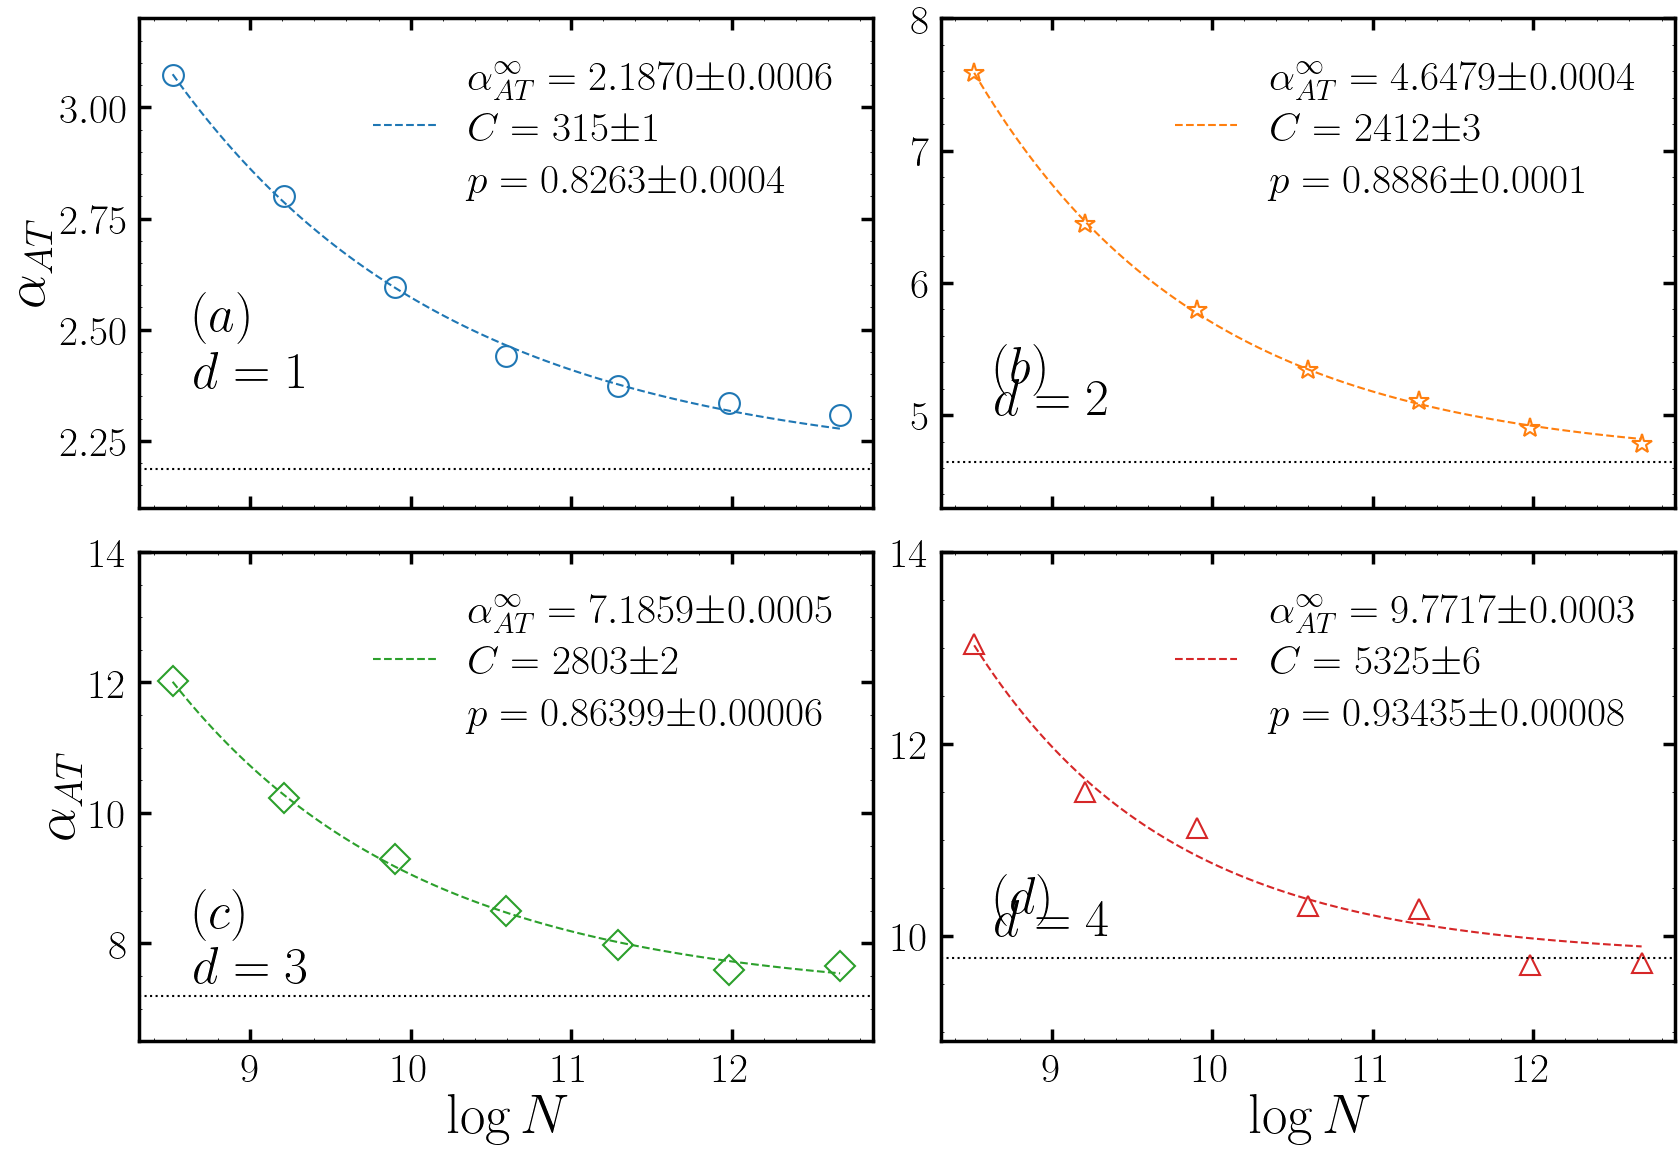

In [27]:
plt.style.use('./properties.mplstyle')
plt.rcParams.update({
    "text.latex.preamble": r"\usepackage{amsmath}"
})
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharex=False, sharey=False, constrained_layout=True)
axs = axs.flatten()

dimensions = [1, 2, 3, 4]
norm = plt.Normalize(vmin=0, vmax=5)
cmap = cm.twilight_shifted.reversed()
N = np.array([5000, 10000, 20000, 40000, 80000, 160000, 320000])
N_s = np.array([20000, 3200, 700, 500, 200, 30, 15])

markers = {1: "o", 2: "*", 3: "D", 4: "^"}

colors = {1: "#1f77b4", 2: "#ff7f0e", 3: "#2ca02c", 4:"#d62728"}
y_limits = {1: [2.1, 3.2], 2: [4.3, 8.0], 3: [6.5, 14.0], 4:[8.9, 14.0]}
markersize = 15
mew = 1.5
thickness = 2.5
fontsize_label = 40
fontsize_ticks = 30
labelsize = 15
label_alpha = ["$(a)$", "$(b)$",
                "$(c)$", "$(d)$"]
label_dim = [f"$d = {d}$" for d in dimensions]
pos_y_dim = [2.37, 5, 7.4, 10]
pos_y_alpha = [2.50, 5.25, 8.25, 10.25]

count = 0

#labelsize = plt.rcParams['xtick.labelsize']

for d, ax in zip(dimensions, axs):
    color = cmap(norm(d))
    
    df_d = df_int[df_int["dim"] == d]
    N_vals = df_d["N"].values
    alpha_vals = df_d["alpha_intercept"].values
    N_vals = np.log(np.array(N_vals))

    nvalues, alpha_inf = N_vals, alpha_vals
    ax.plot(nvalues, alpha_inf, marker=markers[d],
            color='none', markeredgecolor=colors[d], markersize=markersize, mew=mew)
    
    def model_exp(x, alpha_inf, A, p):
        return alpha_inf + A * np.exp(-x**p)

    initial_guess = [2., 100, .5]
    standard_error = 1 / np.sqrt(N*N_s)
    popt, pcov = curve_fit(model_exp, nvalues, alpha_inf, p0=initial_guess,
                           absolute_sigma=True, sigma=standard_error, method='lm', maxfev=10000)
    
    xe = np.linspace(np.min(nvalues), np.max(nvalues), 100)
    y_fit = model_exp(xe, *popt)

    p_vals = popt
    err = np.sqrt(np.diag(pcov))
    alpha_txt = round_value_and_error(p_vals[0], err[0])
    C_txt     = round_value_and_error(p_vals[1], err[1])
    p_txt     = round_value_and_error(p_vals[2], err[2])

    # Legenda alinhada
    special_label = (
        r"$\begin{array}{l}"
        rf"\alpha_{{AT}}^\infty = {alpha_txt} \\"
        rf"C = {C_txt} \\"
        rf"p = {p_txt} "
        r"\end{array}$"
    )

    
    ax.plot(xe, y_fit, '--', linewidth=1.5, color=colors[d], label=special_label)
    
    ax.text(x=8.65, y=pos_y_alpha[count], s=label_alpha[count], fontsize=1.25*fontsize_ticks, color="black")
    ax.text(x=8.65, y=pos_y_dim[count], s=label_dim[count], fontsize=1.25*fontsize_ticks, color="black")
    
    ax.axhline(y=p_vals[0], color='black', linestyle=":", alpha=1, label=r'_nolegend_',linewidth=1.5)
    ax.set_ylim(y_limits[d])
    count += 1

for ax in axs:
    if ax in [axs[0], axs[2]]:
        ax.set_ylabel(r"$\alpha_{AT}$", fontsize=fontsize_label)
        
    if ax in [axs[2], axs[3]]:
        ax.set_xlabel(r'$\log{N}$', fontsize=fontsize_label)
    else:
        ax.tick_params(labelbottom=False)
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=fontsize_ticks, width=thickness, length = 8.5)
    ax.legend(numpoints=1, borderpad=0.5, handlelength=1.5, handletextpad=0.7, labelspacing=0.3, 
              loc=1, fancybox=True, framealpha=0, shadow=False, facecolor="white", 
              fontsize=fontsize_ticks, ncol=1)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness)


    ax.tick_params(bottom=True, left=True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('../../results/alpha_transition.svg',dpi = 300)
plt.show()

In [16]:
N = np.array([5000, 10000, 20000, 40000, 80000, 160000, 320000])
N_s = np.array([20000, 3200, 700, 500, 200, 30, 15])

markers = {1: "o", 2: "*", 3: "D", 4: "^"}

colors = {1: "#1f77b4", 2: "#ff7f0e", 3: "#2ca02c", 4:"#d62728"}
y_limits = {1: [2.1, 3.2], 2: [4.3, 8.0], 3: [6.5, 14.0], 4:[8.9, 14.0]}
markersize = 15
mew = 1.5
thickness = 2.5
fontsize_label = 40
fontsize_ticks = 30
labelsize = 15
label_alpha = ["$(a)$", "$(b)$",
                "$(c)$", "$(d)$"]
label_dim = [f"$d = {d}$" for d in dimensions]
pos_y_dim = [2.37, 5, 7.4, 10]
pos_y_alpha = [2.50, 5.25, 8.25, 10.25]

count = 0

#labelsize = plt.rcParams['xtick.labelsize']
#n_my = 120000
n_my = 250000
for d in dimensions:

    df_d = df_int[df_int["dim"] == d]
    N_vals = df_d["N"].values
    alpha_vals = df_d["alpha_intercept"].values
    N_vals = np.log(np.array(N_vals))

    nvalues, alpha_inf = N_vals, alpha_vals
    
    
    def model_exp(x, alpha_inf, A, p):
        return alpha_inf + A * np.exp(-x**p)
    def predict_alpha(N, popt):
        x = np.log(N)
        return model_exp(x, *popt)
    
    initial_guess = [2., 100, .5]
    standard_error = 1 / np.sqrt(N*N_s)
    popt, pcov = curve_fit(model_exp, nvalues, alpha_inf, p0=initial_guess,
                           absolute_sigma=True, sigma=standard_error, method='lm', maxfev=10000)
    
    xe = np.linspace(np.min(nvalues), np.max(nvalues), 100)
    y_fit = model_exp(xe, *popt)

    p_vals = popt
    err = np.sqrt(np.diag(pcov))
    alpha_predict = predict_alpha(n_my, popt)
    print(f"{alpha_predict:.2f}")

2.30
4.86
7.60
9.77


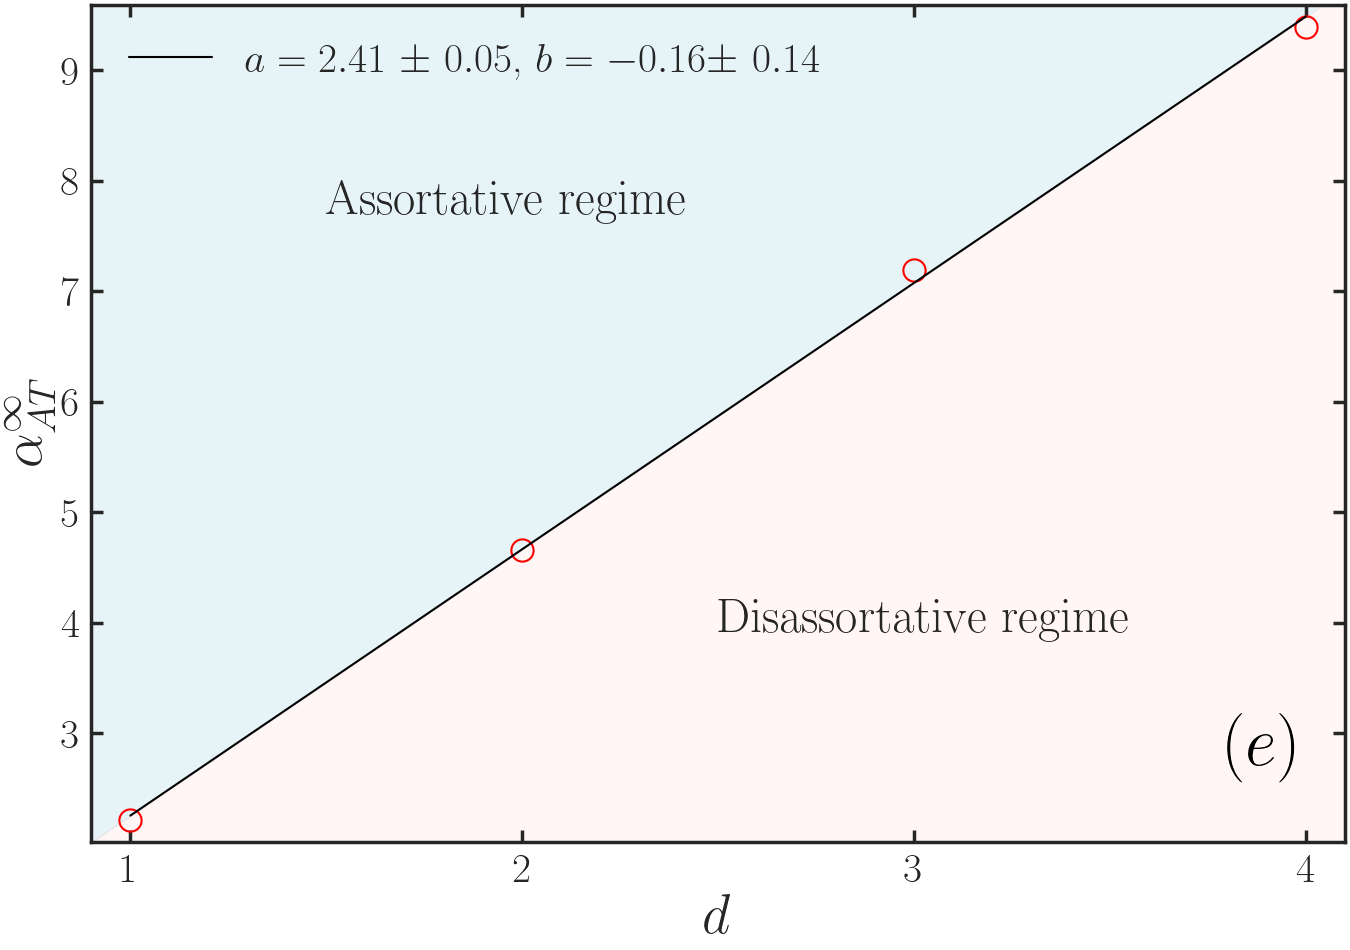

In [139]:
#plt.style.use('./properties.mplstyle')
plt.rcParams.update({
    "text.latex.preamble": r"\usepackage{amsmath}"
})
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
figsize=(10, 12)

dimensions = [1, 2, 3, 4]
norm = plt.Normalize(vmin=0, vmax=5)
cmap = cm.twilight_shifted.reversed()
N = np.array([5000, 10000, 20000, 40000, 80000, 160000, 320000])
N_s = np.array([20000, 3200, 700, 500, 200, 30, 15])

marker = "o"
color_marker = "red"
markersize = 16
mew = 1.5
thickness = 2.5
fontsize_label = 40
fontsize_ticks = 30
labelsize = 27
count = 0

#labelsize = plt.rcParams['xtick.labelsize']
alpha_a_inf, alpha_a_inf_err = [], []
for d in dimensions:
    color = cmap(norm(d))
    
    df_d = df_int[df_int["dim"] == d]
    N_vals = df_d["N"].values
    alpha_vals = df_d["alpha_intercept"].values
    N_vals = np.log(np.array(N_vals))

    nvalues, alpha_inf = N_vals, alpha_vals
    
    def model_exp(x, alpha_inf, A, p):
        return alpha_inf + A * np.exp(-x**p)

    initial_guess = [2., 100, .5]
    standard_error = 1 / np.sqrt(N*N_s)
    popt, pcov = curve_fit(model_exp, nvalues, alpha_inf, p0=initial_guess,
                           absolute_sigma=True, sigma=standard_error, method='lm', maxfev=10000)
    
    xe = np.linspace(np.min(nvalues), np.max(nvalues), 100)
    y_fit = model_exp(xe, *popt)

    p_vals = popt
    err = np.sqrt(np.diag(pcov))
    alpha_A_inf, err_alpha_A_inf = p_vals[0], err[0]
    alpha_a_inf.append(alpha_A_inf)
    alpha_a_inf_err.append(err_alpha_A_inf)

alpha_a_inf, alpha_a_inf_err = np.array(alpha_a_inf), np.array(alpha_a_inf_err)

y_teo = linear_regression(np.array(dimensions), alpha_a_inf, alpha_a_inf_err, Parameter=False)
a,b,err_a,err_b = linear_regression(np.array(dimensions), alpha_a_inf, alpha_a_inf_err, Parameter=True)

# Plot data
plt.plot(dimensions, alpha_a_inf,linestyle='none', marker=marker, color=color_marker, mew=mew, markersize=markersize)
# Linear rregression
plt.plot(dimensions, y_teo, label=f"$a = {a:.2f}$ $\\pm$ ${err_a:.2f}$, $b =$ ${b:.2f} \\pm$ ${err_b:.2f}$", color='k')

plt.xlabel(r"$d$", fontsize=fontsize_label)
plt.ylabel(r"$\alpha_{AT}^\infty$", fontsize=fontsize_label)
plt.text(x=3.8, y=2.7, s="$(e)$", fontsize=fontsize_label*1.25, color="black")
plt.xticks([1, 2, 3, 4], ["1", "2", "3", "4"])  # ou outro texto
# Define a espessura das bordas
ax = plt.gca()  # pega os eixos atuais

ax.tick_params(bottom=True, left=True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for spine in ax.spines.values():
    spine.set_linewidth(thickness)


ax.tick_params(axis='both', labelsize=fontsize_ticks, width=thickness, length = 8.5)
# Defina limites desejados explicitamente antes
ax.set_xlim(min(dimensions) - 0.1, max(dimensions) + 0.1)
ax.set_ylim(min(alpha_a_inf) - 0.2, max(alpha_a_inf) + 0.2)

# Agora sim obtemos os limites corretos
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x_vals_fill = np.linspace(xlim[0], xlim[1], 1000)
y_r_fill = a * x_vals_fill + b

# Preencher acima da reta
plt.fill_between(x_vals_fill, y_r_fill, ylim[1],
                 where=(y_r_fill < ylim[1]),
                 color='lightblue', alpha=0.3, zorder=0)

# Preenchx_vals_fill[-1]- x_vals_fill[0]er abaixo da reta
plt.fill_between(x_vals_fill, ylim[0], y_r_fill,
                 where=(y_r_fill > ylim[0]),
                 color='mistyrose', alpha=0.3, zorder=0)
x_tot = xlim[1] - xlim[0]
y_tot = ylim[1] - ylim[0]

plt.text(x=xlim[0] + (2/4)*x_tot, y=ylim[0]+(1/4)*y_tot,s="Disassortative regime", fontsize=35)
plt.text(x=xlim[0] + (0.75/4)*x_tot, y=ylim[0]+(3/4)*y_tot,s="Assortative regime", fontsize=35)

plt.tight_layout()
plt.legend(fontsize=30)

plt.savefig('../../results/d_alpha_transition.png',dpi = 300)
plt.show()

## \alpha_T validation


In [69]:
N_val = [7500]
parms_validation = {"N":[], "dim":[], "alpha_T_emp":[], "alpha_T_teo":[], "alpha_T_teo_err":[]}
dimensions = [1,2,3,4]

for dim in dimensions:
    for i in range(len(N_val)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N_val[i]) & (df["alpha_g"]==2.0)]
        
        df_ord = df_dim.sort_values(by="alpha_a")
        
        x = df_ord['alpha_a'].values
        y = df_ord['ass_coeff_mean'].values
        
        x_int, y_int = find_intersection(x, y)
        
        parms_validation["N"].append(N_val[i])
        parms_validation["dim"].append(int(dim))
        parms_validation["alpha_T_emp"].append(float(x_int))

N = np.array([5000, 10000, 20000, 40000, 80000, 160000, 320000])
N_s = np.array([20000, 3200, 700, 500, 200, 30, 15])
dimensions = [1,2,3,4]

def model_exp(N, alpha_inf, A, p):
    return alpha_inf + A * np.exp(-N**p)

def model_exp_gradient(N, alpha_inf, A, p):
    """
    Derivadas parciais de model_exp em relação a alpha_inf, A e p
    """
    exp_term = np.exp(-N**p)
    d_alpha_inf = 1
    d_A = exp_term
    d_p = A * exp_term * (-N**p) * np.log(N)
    return np.array([d_alpha_inf, d_A, d_p])

for d in dimensions:
    color = cmap(norm(d))
    
    df_d = df_int[df_int["dim"] == d]
    N_vals = df_d["N"].values
    alpha_vals = df_d["alpha_intercept"].values
    N_vals = np.log(np.array(N_vals))

    nvalues, alpha_inf = N_vals, alpha_vals
    ax.plot(nvalues, alpha_inf, marker=markers[d],
            color='none', markeredgecolor=colors[d], markersize=markersize, mew=mew)
    
    initial_guess = [2., 100, .5]
    standard_error = 1 / np.sqrt(N*N_s)
    popt, pcov = curve_fit(model_exp, nvalues, alpha_inf, p0=initial_guess,
                           absolute_sigma=True, sigma=standard_error, method='lm', maxfev=10000)
    
    for n in N_val:
        alpha_t = model_exp(np.log(n), *popt)
        grad = model_exp_gradient(np.log(n), *popt)

        # erro estimado via propagação
        alpha_t_error = np.sqrt(grad @ pcov @ grad.T)
        
        parms_validation["alpha_T_teo"].append(alpha_t)
        parms_validation["alpha_T_teo_err"].append(alpha_t_error)

df_val = pd.DataFrame(data=parms_validation)
df_val


,N,dim,alpha_T_emp,alpha_T_teo,alpha_T_teo_err
0,7500,1,2.889774,2.892148,0.000104
1,7500,2,6.884142,6.863388,0.000111
2,7500,3,10.859660,10.902743,0.000108
3,7500,4,12.223766,12.115564,0.000117


In [80]:
df_val["sigma_empirico"] = 0.003 * df_val["alpha_T_emp"]  # 0.3%
df_val["sigma_total"] = np.sqrt(df_val["alpha_T_teo_err"]**2 + df_val["sigma_empirico"]**2)
df_val["residuo"] = df_val["alpha_T_emp"] - df_val["alpha_T_teo"]
sigma_res = df_val["residuo"].std()

df_val["chi2_contrib_alt"] = (df_val["residuo"] / sigma_res)**2
chi2_red_alt = df_val["chi2_contrib_alt"].sum() / (len(df_val) - 3)
res_std = df_val["residuo"].std()
escala = np.sqrt(chi2_red_alt)  # para normalizar a variância
erro_reescalado = escala * res_std
print(erro_reescalado)

print(f"Chi² reduzido alternativo = {chi2_red_alt:.4f}")



0.11832194234387992
Chi² reduzido alternativo = 3.4266


0.0


/tmp/ipykernel_21757/4122910943.py:53: RuntimeWarning: divide by zero encountered in divide
  df_val["chi2_contrib_alt"] = (res_used / sigma_res)**2


ValueError: Length of values (1) does not match length of index (4)

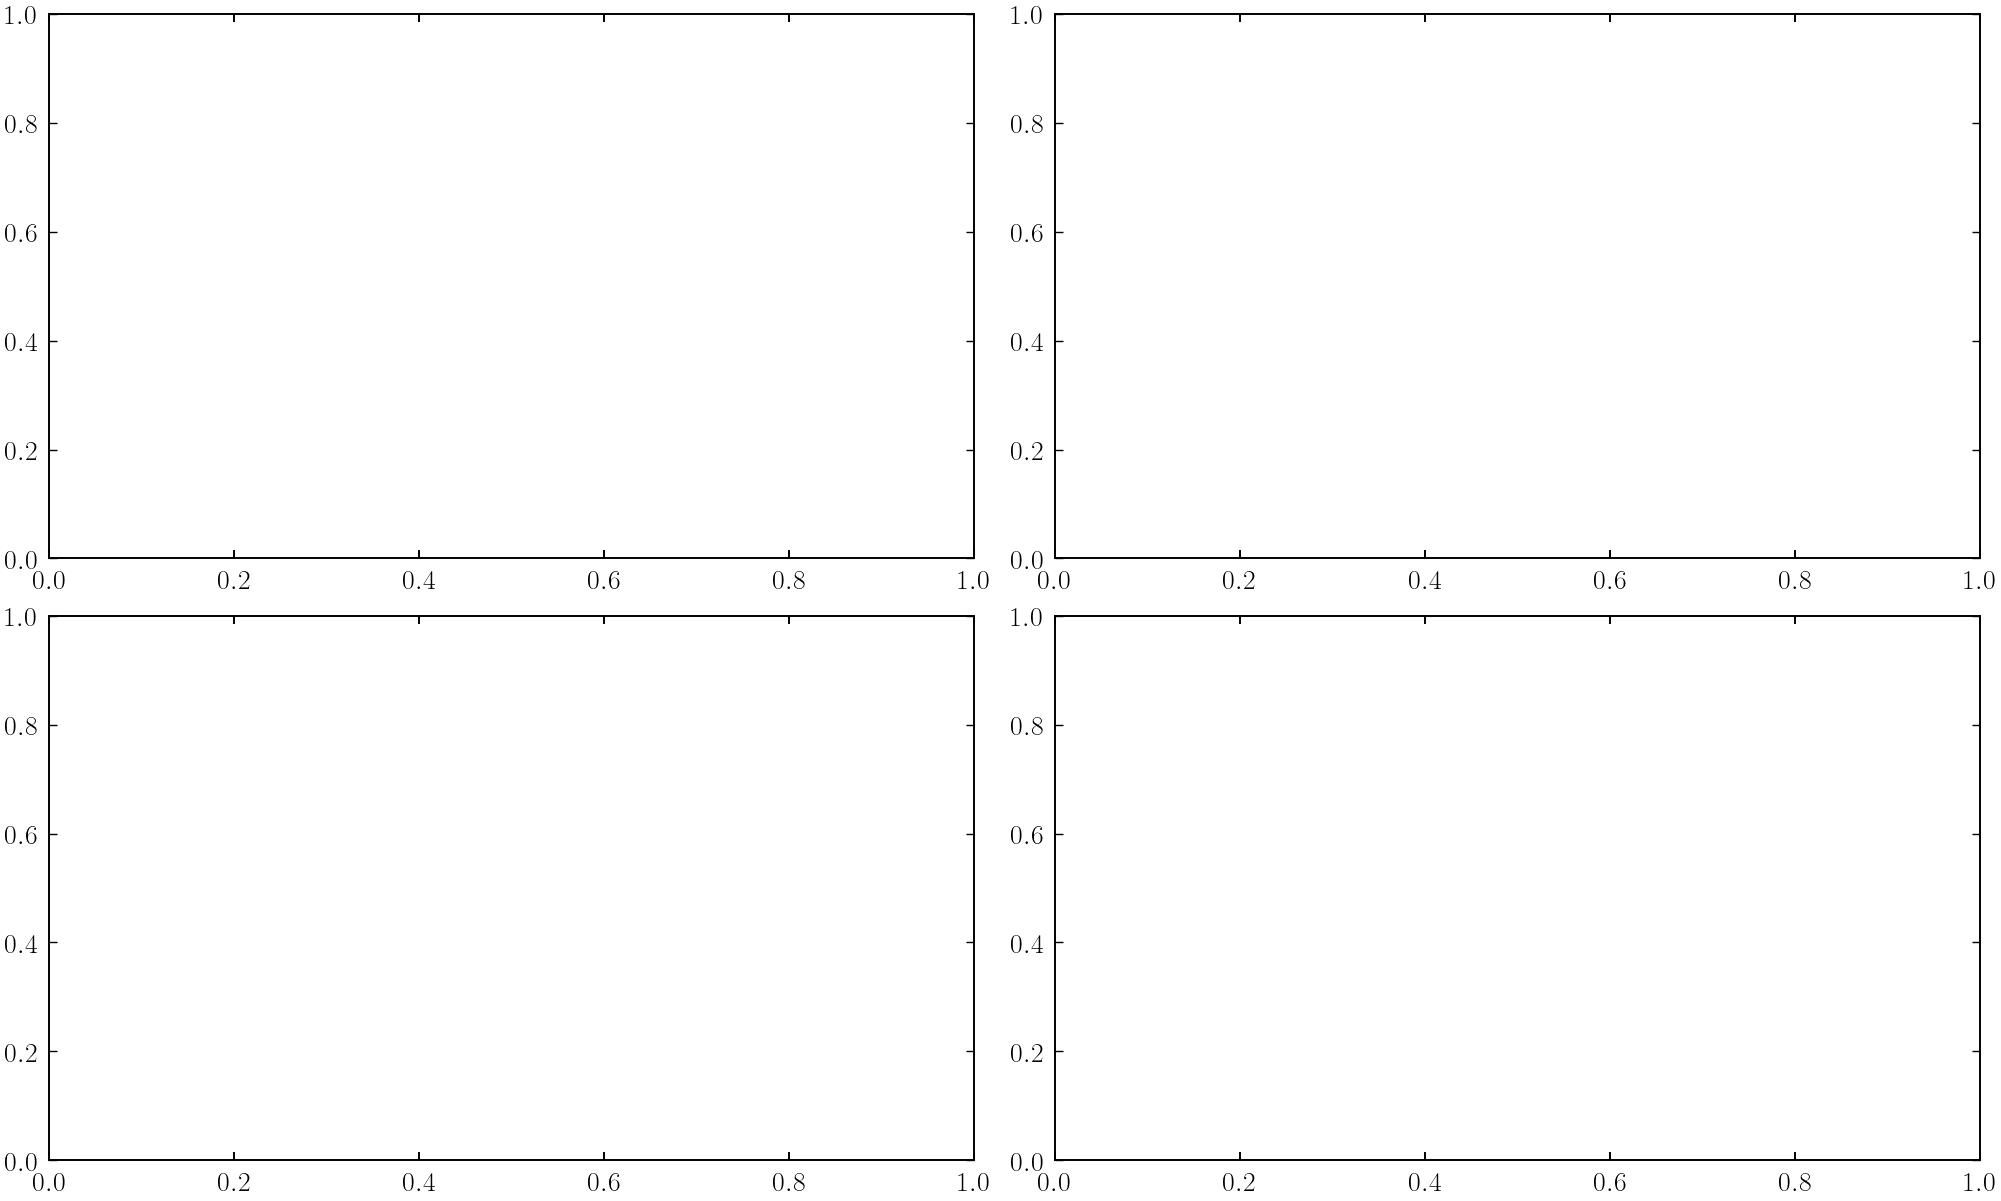

In [ ]:
plt.style.use('./properties.mplstyle')
plt.rcParams.update({
    "text.latex.preamble": r"\usepackage{amsmath}"
})
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharex=False, sharey=False, constrained_layout=True)
axs = axs.flatten()

dimensions = [1, 2, 3, 4]
norm = plt.Normalize(vmin=0, vmax=5)
cmap = cm.twilight_shifted.reversed()
N = np.array([5000, 10000, 20000, 40000, 80000, 160000, 320000])
N_s = np.array([20000, 3200, 700, 500, 200, 30, 15])

markers = {1: "o", 2: "*", 3: "D", 4: "^"}

colors = {1: "#1f77b4", 2: "#ff7f0e", 3: "#2ca02c", 4:"#d62728"}
y_limits = {1: [2.1, 3.2], 2: [4.3, 8.0], 3: [6.5, 14.0], 4:[8.9, 14.0]}
markersize = 15
mew = 1.5
thickness = 2.5
fontsize_label = 40
fontsize_ticks = 30
labelsize = 15
label_alpha = ["$(a)$", "$(b)$",
                "$(c)$", "$(d)$"]
label_dim = [f"$d = {d}$" for d in dimensions]
pos_y_dim = [2.37, 5, 7.4, 10]
pos_y_alpha = [2.50, 5.25, 8.25, 10.25]

count = 0

#labelsize = plt.rcParams['xtick.labelsize']

for d, ax in zip(dimensions, axs):
    color = cmap(norm(d))
    df_val_dim = df_val[df_val["dim"]==d]
    n_used = []
    res_used = []
    for n in N_val:
        df_val_dim_n = df_val_dim[df_val_dim["N"]==n]
        
        alpha_T_emp = df_val_dim_n["alpha_T_emp"].values
        alpha_T_teo = df_val_dim_n["alpha_T_teo"].values

        res = alpha_T_teo - alpha_T_emp
        df_val["erro_rel_%"] = 100 * np.abs(res_used) / df_val["alpha_T_emp"]    
        correlacao = df_val["alpha_T_emp"].corr(df_val["alpha_T_teo"])
        n_used.append(n)
        res_used.append(res[0])
    
    sigma_res = np.std(res_used)
    df_val["chi2_contrib_alt"] = (res_used / sigma_res)**2
    chi2_red_alt = df_val["chi2_contrib_alt"].sum() / (len(df_val) - 3)
    
    
    print(f"Chi² reduzido alternativo = {chi2_red_alt:.4f}")

    ax.plot(n_used,res_used, 'o',markersize=markersize,mew=mew ,color=colors[d])

    
    ax.axhline(y=0.0, color='black', linestyle=":", alpha=1, label=r'_nolegend_',linewidth=1.5)
    #ax.set_ylim(y_limits[d])
    count += 1

for ax in axs:
    if ax in [axs[0], axs[2]]:
        ax.set_ylabel(r"$(\alpha_{T,emp} - \alpha_{T,teo})$", fontsize=fontsize_label)
        
    if ax in [axs[2], axs[3]]:
        ax.set_xlabel(r'$N$', fontsize=fontsize_label)
    else:
        ax.tick_params(labelbottom=False)
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=fontsize_ticks, width=thickness, length = 8.5)
    ax.legend(numpoints=1, borderpad=0.5, handlelength=1.5, handletextpad=0.7, labelspacing=0.3, 
              loc=1, fancybox=True, framealpha=0, shadow=False, facecolor="white", 
              fontsize=fontsize_ticks, ncol=1)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness)


    ax.tick_params(bottom=True, left=True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
#plt.savefig('../../results/residues_R.svg',dpi = 300)
plt.show()

In [67]:
df_val["residuo"] = df_val["alpha_T_emp"] - df_val["alpha_T_teo"]
df_val["erro_rel_%"] = 100 * np.abs(df_val["residuo"]) / df_val["alpha_T_emp"]
df_val["chi2_contrib"] = (df_val["residuo"] / df_val["alpha_T_teo_err"])**2

chi2_red = df_val["chi2_contrib"].sum() / (len(df_val) - 3)  # 3 parâmetros no modelo

correlacao = df_val["alpha_T_emp"].corr(df_val["alpha_T_teo"])
# Suponha erro experimental de 0.3% dos valores simulados (ou use std de amostras se tiver)
df_val["sigma_empirico"] = 0.003 * df_val["alpha_T_emp"]

# Combine erro empírico + teórico (propagado)
df_val["sigma_total"] = np.sqrt(df_val["alpha_T_teo_err"]**2 + df_val["sigma_empirico"]**2)

# Novo chi2
df_val["chi2_contrib"] = (df_val["residuo"] / df_val["sigma_total"])**2
chi2_red = df_val["chi2_contrib"].sum() / (len(df_val) - 3)

print(f"Chi² reduzido = {chi2_red:.4f}")
print(f"Correlação de Pearson = {correlacao:.6f}")


Chi² reduzido = 11.5394
Correlação de Pearson = 0.999900
